In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# ***Importing/Reading Dataset***

#Details about the Dataset:

### #make --> Brand of the Car

### #model --> Model of the Car

### #vehicle_class --> Body type of the Car

### #engine_size --> Size of Car engine in Litres

### #cylinder --> No. of cylinder in Car

### #transmission --> "A" for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable',
M" for 'Manual'.

### #fuel_type --> "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.

### #fuel_consumption_city --> City fuel consumption ratings, in litres per 100 kilometres.

### #fuel_consumption_hwy --> Highway fuel consumption ratings, in litres per 100 kilometres.

### #fuel_consumption_comb(l/100km) --> the combined fuel consumption rating (55% city, 45% highway), in L/100 km.

### #fuel_consumption_comb(mpg) --> the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).

### #co2_emissions (Dependent or Target Feature) --> the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

In [2]:
df = pd.read_csv("co2_emissions.csv")

In [3]:
df



make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

In [4]:
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [6]:
df1 = df.copy()

In [7]:
df1.head(2)

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX       COMPACT          2.0          4           AS         Z   
1  ACURA   ILX       COMPACT          2.4          4            M         Z   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221

# ***Auto EDA***

In [8]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.5 MB/s eta 0:00:00


In [9]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('co2_emission.html')

                                             |          | [  0%]   00:00 -> (? left)

Report co2_emission.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a791372fcb3c9c3cbbdc74879a266aa812e03b892603ded2814424bfe9fbc569
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [11]:
from ydata_profiling import ProfileReport

EDA_report= ProfileReport(df)
EDA_report.to_file(output_file='report.html')
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# ***EDA***

In [12]:
df.isna().sum()/len(df)*100

make                              0.0
model                             0.0
vehicle_class                     0.0
engine_size                       0.0
cylinders                         0.0
transmission                      0.0
fuel_type                         0.0
fuel_consumption_city             0.0
fuel_consumption_hwy              0.0
fuel_consumption_comb(l/100km)    0.0
fuel_consumption_comb(mpg)        0.0
co2_emissions                     0.0
dtype: float64

In [13]:
df1.duplicated().sum()

1112

In [14]:
df1.drop_duplicates(inplace = True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   model                           6273 non-null   object 
 2   vehicle_class                   6273 non-null   object 
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   object 
 6   fuel_type                       6273 non-null   object 
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memo

In [16]:
df1.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  6273.000000  6273.000000            6273.000000           6273.000000   
mean      3.163000     5.620596              12.615591              9.073426   
std       1.365294     1.846424               3.550572              2.277893   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.700000             10.300000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     6273.000000                 6273.000000   
mean                        11.022111                   27.395026   
std                          2.945028                    7.225472   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.700000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    6273.000000  
mean      251.247250  
std        59.235396  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       289.000000  
max       522.000000

In [17]:
df1.head(2)

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX       COMPACT          2.0          4           AS         Z   
1  ACURA   ILX       COMPACT          2.4          4            M         Z   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221

In [18]:
df1[['make','model','vehicle_class','transmission','fuel_type']].value_counts()

make  model                            vehicle_class            transmission  fuel_type
FORD  F-150 4X4                        PICKUP TRUCK - STANDARD  AS            X            16
      F-150                            PICKUP TRUCK - STANDARD  AS            X            16
      MUSTANG                          SUBCOMPACT               M             X            13
      EDGE AWD                         SUV - SMALL              AS            X            13
      FUSION                           MID-SIZE                 AS            X            12
                                                                                           ..
JEEP  WRANGLER UNLIMITED 4X4 (4-DOOR)  SUV - SMALL              A             X             1
BMW   M2 Competition                   SUBCOMPACT               M             Z             1
JEEP  WRANGLER JK UNLIMITED 4X4        SUV - SMALL              M             X             1
                                                                A 

In [19]:
df1['make'].value_counts()

make
FORD             575
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           274
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            159
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: count, dtype: int64

In [20]:
df1['model'].value_counts()

model
F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               26
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: count, Length: 2053, dtype: int64

In [21]:
df1['vehicle_class'].value_counts()

vehicle_class
SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: count, dtype: int64

In [22]:
df1['fuel_type'].value_counts()

fuel_type
X    3030
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

In [23]:
df1['transmission'].value_counts()

transmission
AS    2720
A     1536
M     1019
AM     540
AV     458
Name: count, dtype: int64

In [24]:
df1.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [25]:
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

### ***Transformation (Categorical to Numeric)***

In [26]:
df1[['make','model','vehicle_class','transmission', 'fuel_type']] = df1[['make','model','vehicle_class','transmission', 'fuel_type']].apply(lambda x: pd.factorize(x)[0])

In [27]:
df1.dtypes

make                                int64
model                               int64
vehicle_class                       int64
engine_size                       float64
cylinders                           int64
transmission                        int64
fuel_type                           int64
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [28]:
df1.describe().T

count        mean         std   min    25%  \
make                            6273.0   18.087518   10.904421   0.0    8.0   
model                           6273.0  779.527180  555.769810   0.0  294.0   
vehicle_class                   6273.0    4.395823    3.932307   0.0    1.0   
engine_size                     6273.0    3.163000    1.365294   0.9    2.0   
cylinders                       6273.0    5.620596    1.846424   3.0    4.0   
transmission                    6273.0    1.546150    1.660373   0.0    0.0   
fuel_type                       6273.0    1.147936    1.055440   0.0    0.0   
fuel_consumption_city           6273.0   12.615591    3.550572   4.2   10.1   
fuel_consumption_hwy            6273.0    9.073426    2.277893   4.0    7.5   
fuel_consumption_comb(l/100km)  6273.0   11.022111    2.945028   4.1    8.9   
fuel_consumption_comb(mpg)      6273.0   27.395026    7.225472  11.0   22.0   
co2_emissions                   6273.0  251.247250   59.235396  96.0  208.0   

                                  50%     75%     max  
make                             15.0    27.0    41.0  
model                           647.0  1173.0  2052.0  
vehicle_class                     3.0     7.0    15.0  
engine_size                       3.0     3.7     8.4  
cylinders                         6.0     6.0    16.0  
transmission                      1.0     3.0     4.0  
fuel_type                         2.0     2.0     4.0  
fuel_consumption_city            12.1    14.7    30.6  
fuel_consumption_hwy              8.7    10.3    20.6  
fuel_consumption_comb(l/100km)   10.6    12.7    26.1  
fuel_consumption_comb(mpg)       27.0    32.0    69.0  
co2_emissions                   246.0   289.0   522.0

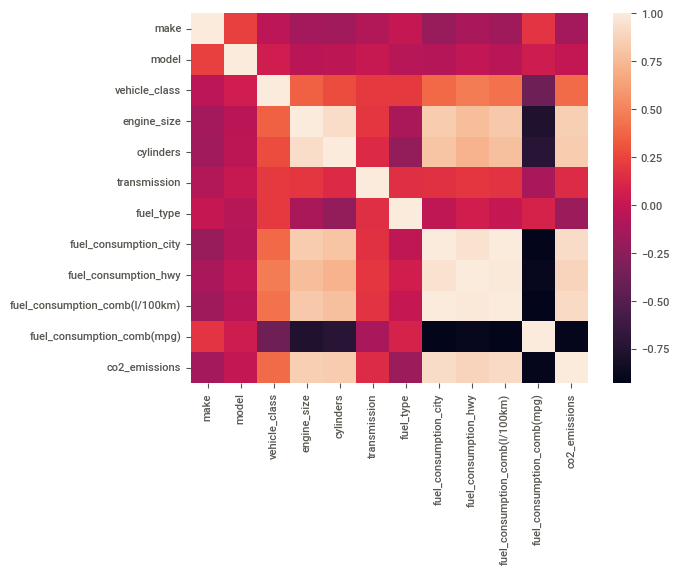

In [29]:
sns.heatmap(df1.corr())
plt.show()

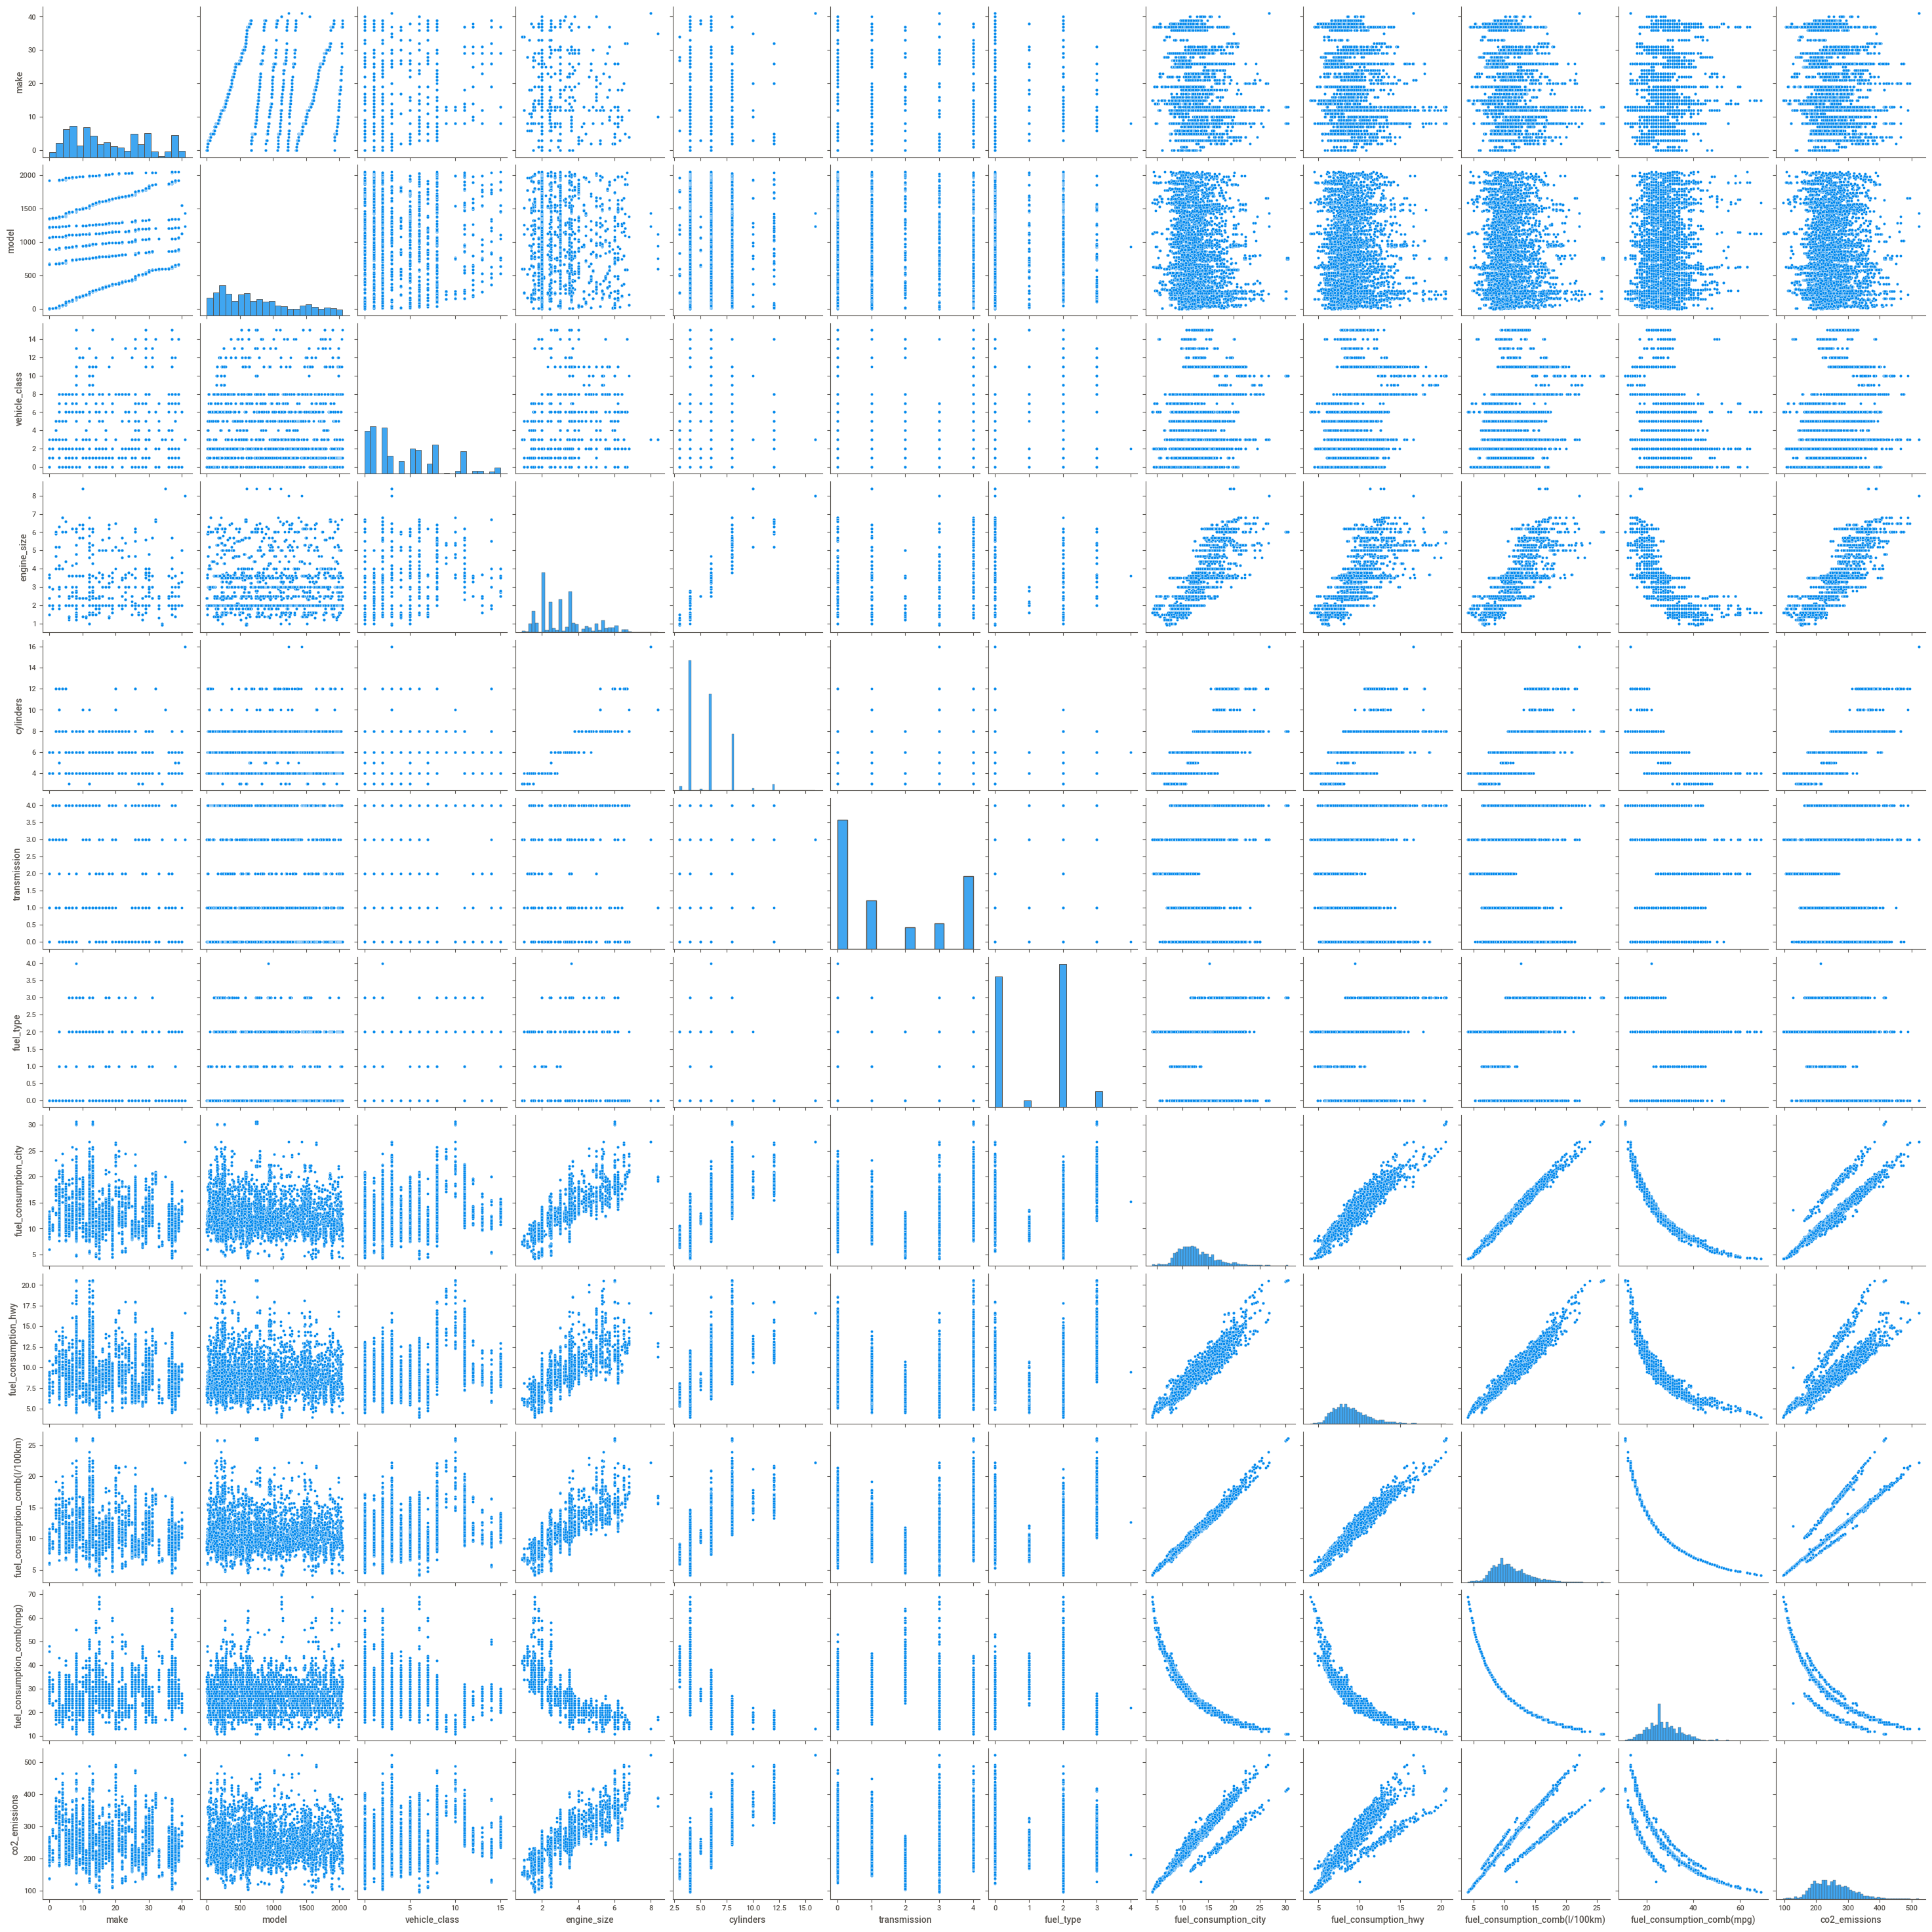

In [30]:
sns.pairplot(df1)
plt.show()

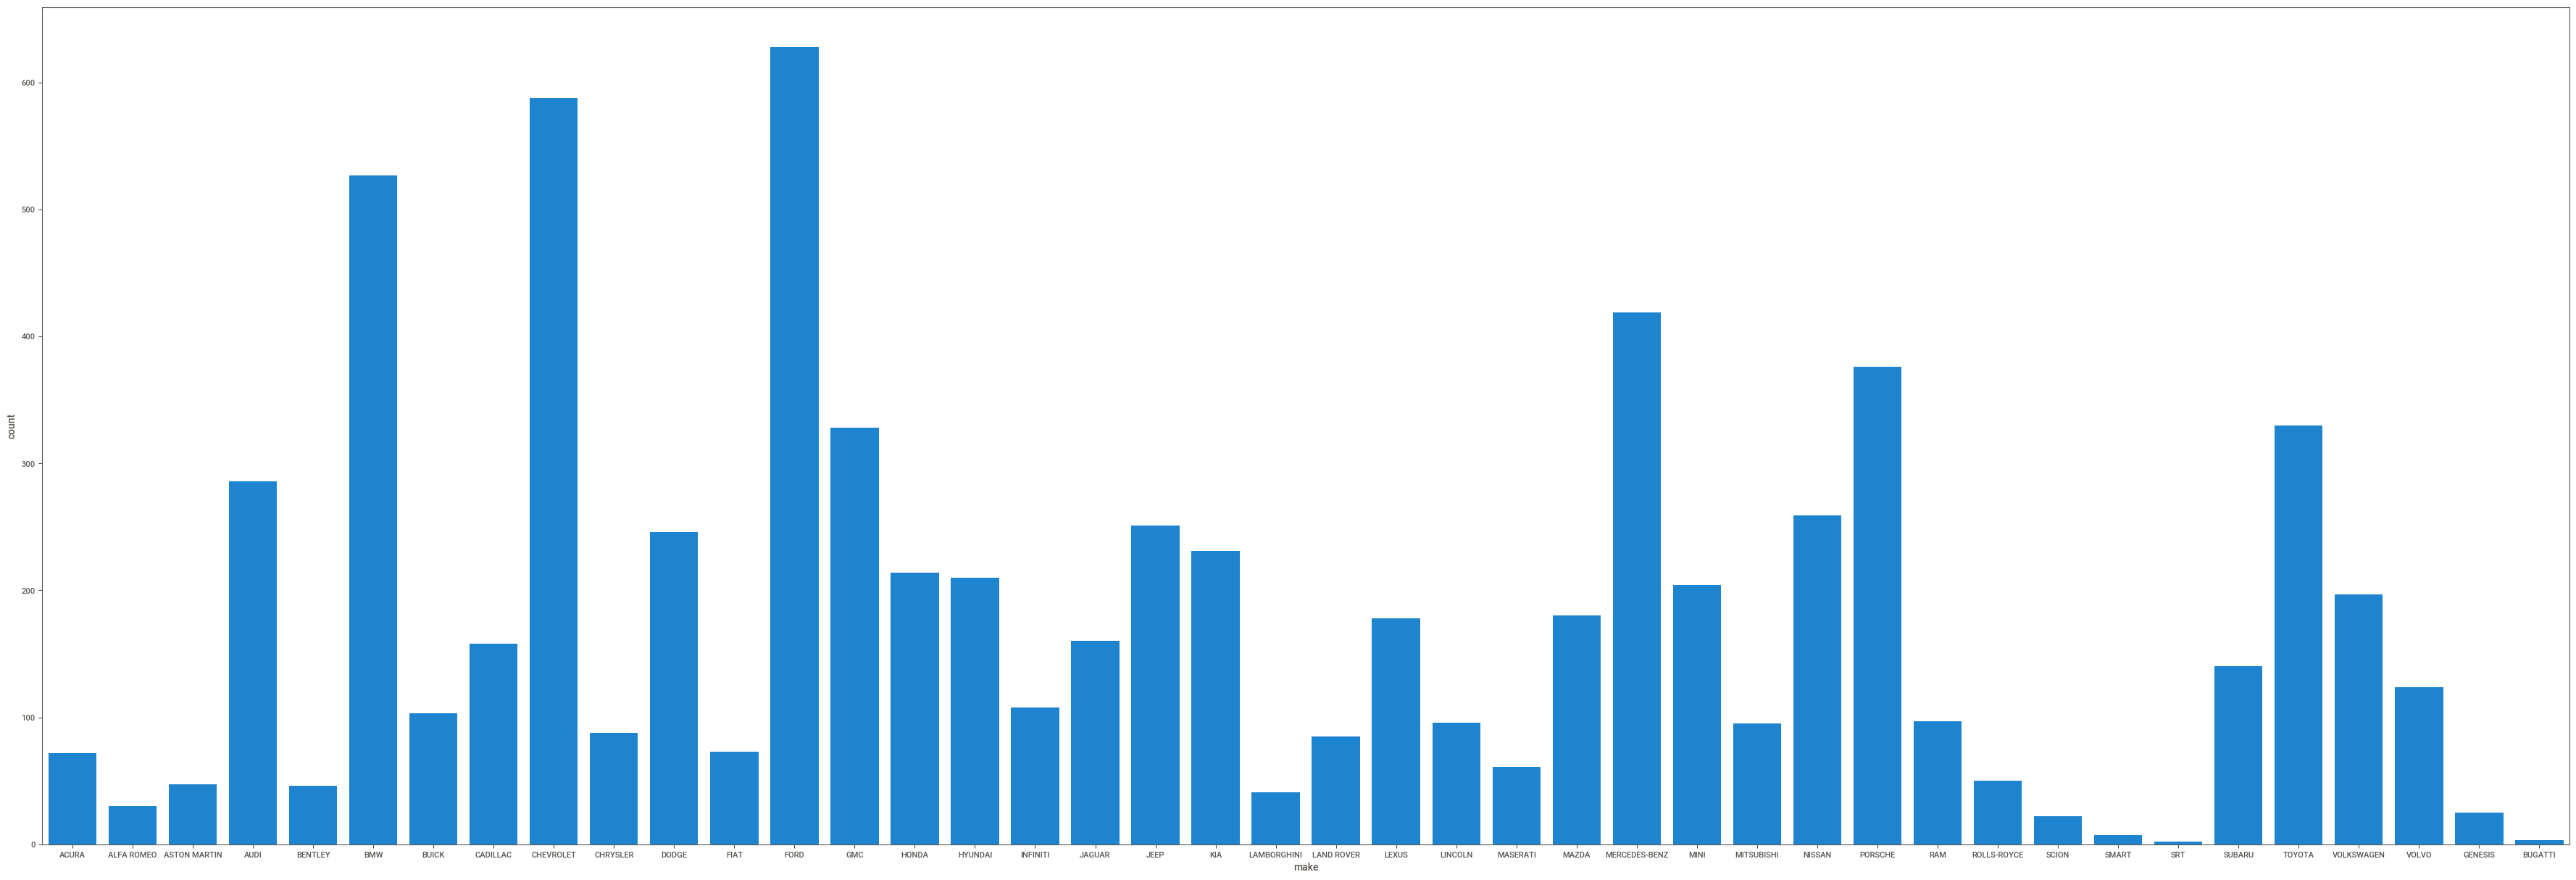

In [31]:
plt.figure(figsize=(45,15))
sns.countplot(x='make',data=df) #countplot shows us total of different class which are present in column
plt.show()

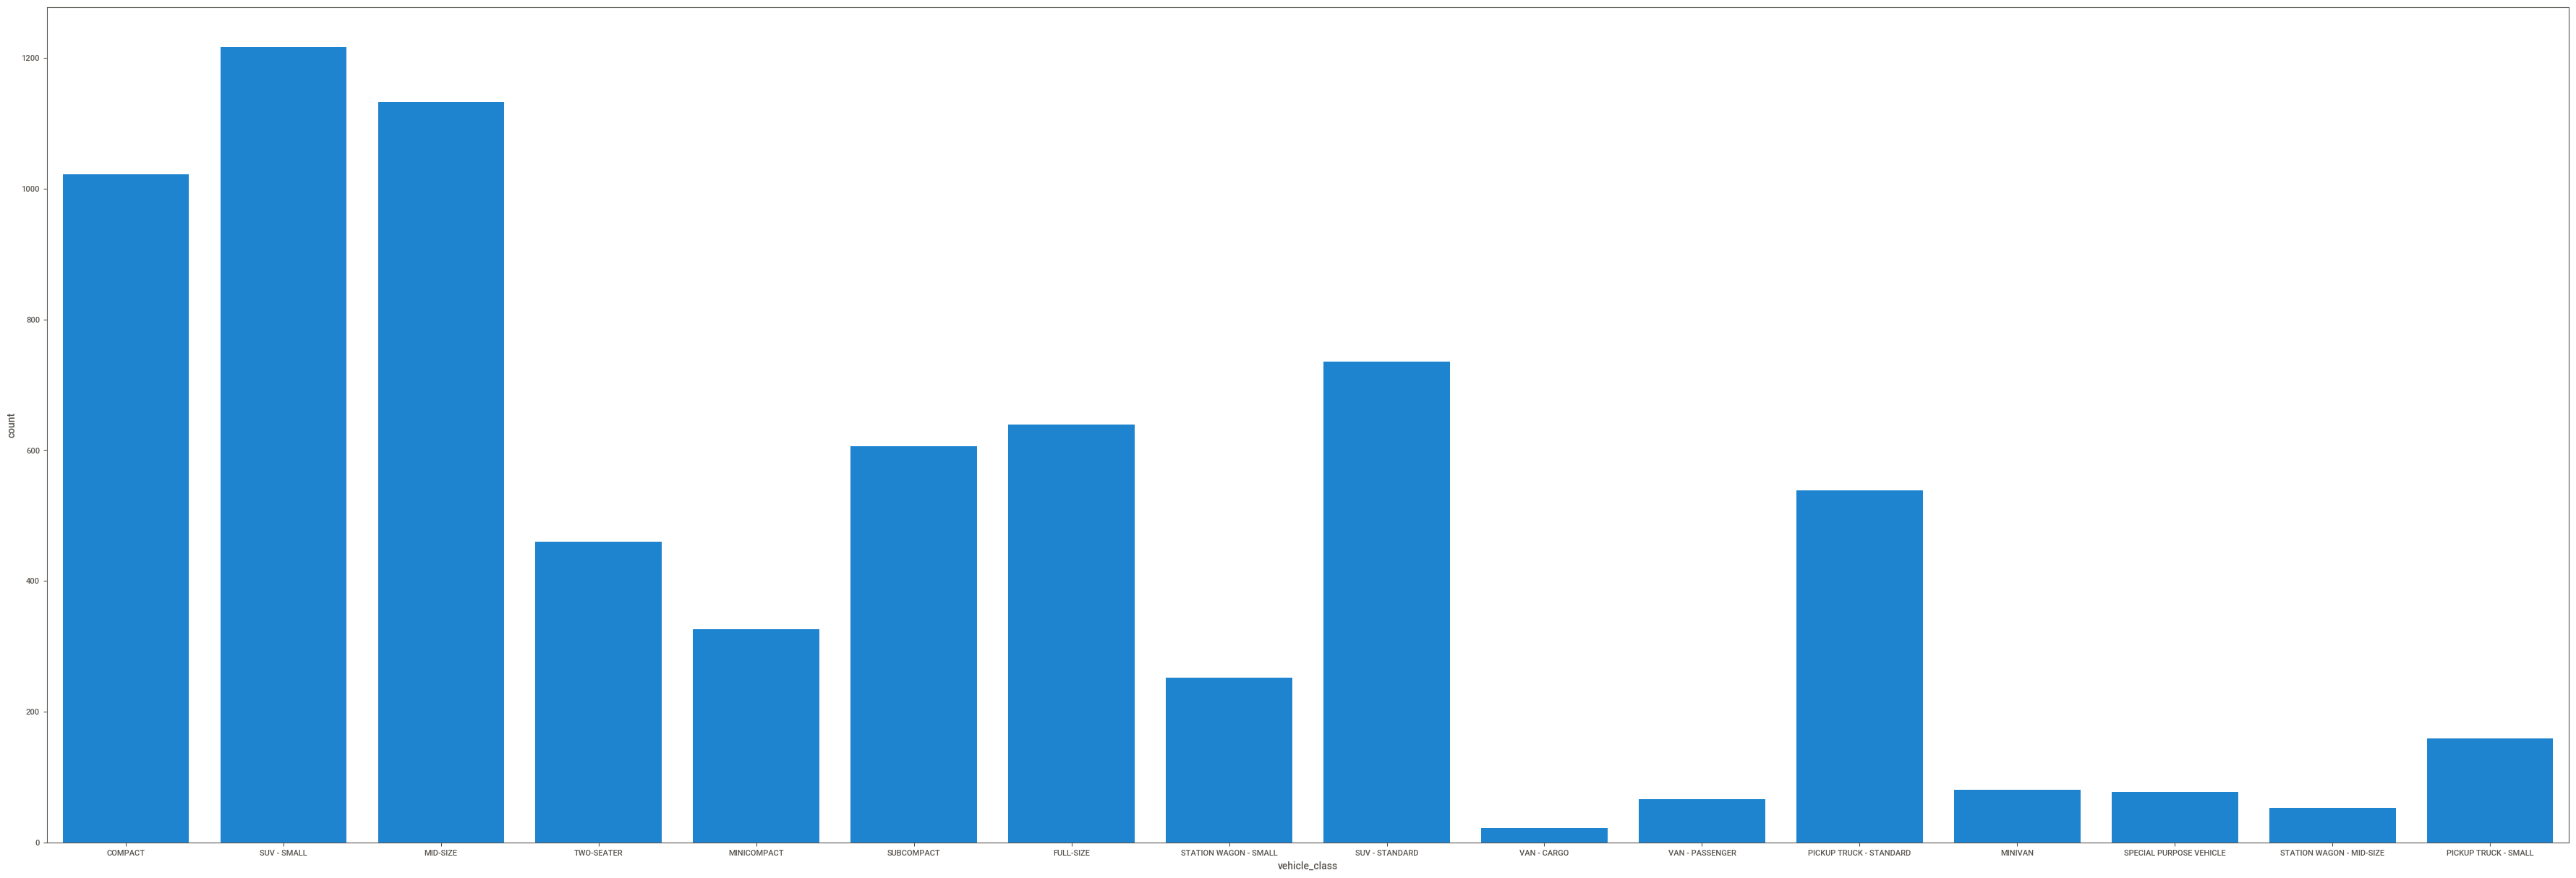

In [32]:
plt.figure(figsize=(45,15))
sns.countplot(x='vehicle_class',data=df)
plt.show()

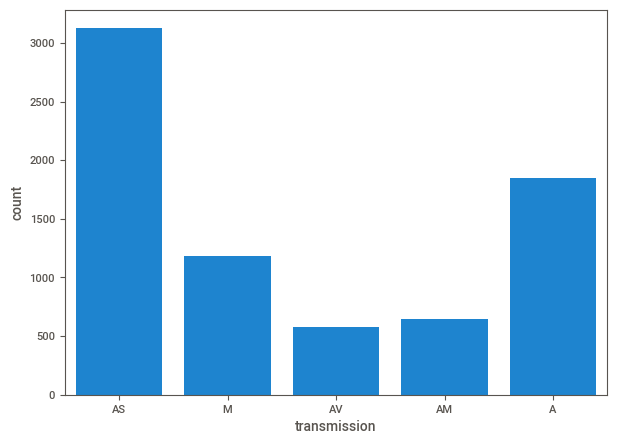

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(x='transmission',data=df)
plt.show()

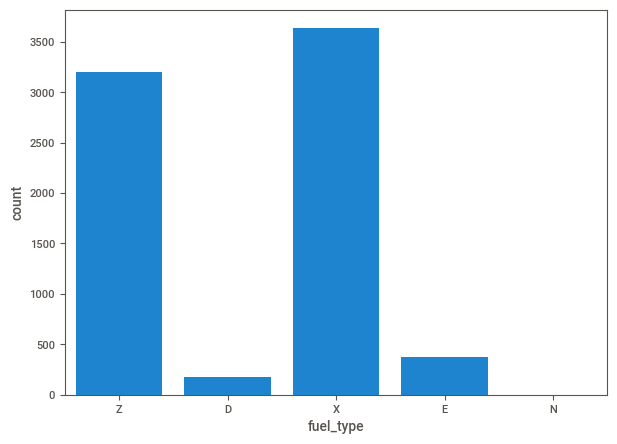

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x='fuel_type',data=df)
plt.show()

In [35]:
df1.head(1)

make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0      0              0          2.0          4             0   

   fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0          0                    9.9                   6.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196

In [36]:
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

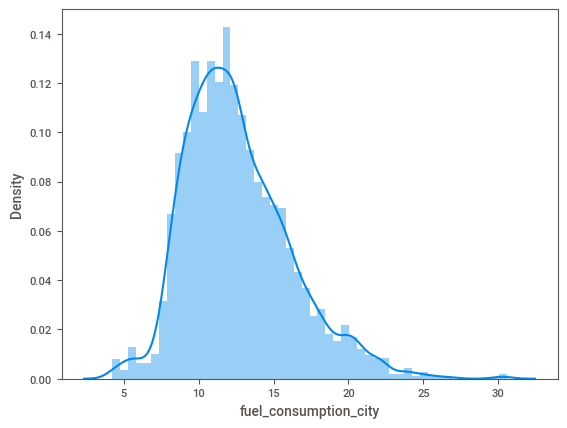

In [37]:
sns.distplot(df1['fuel_consumption_city'])
plt.show()

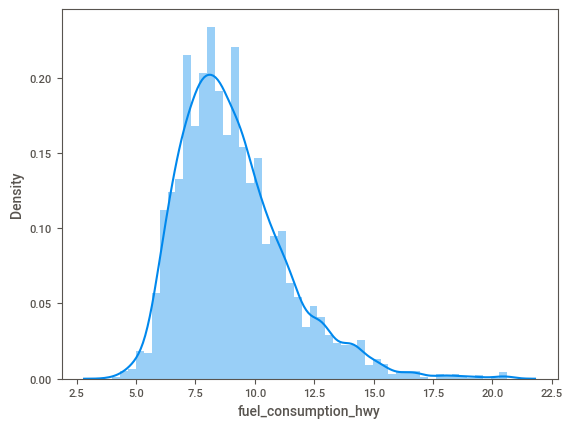

In [38]:
sns.distplot(df1['fuel_consumption_hwy'])
plt.show()

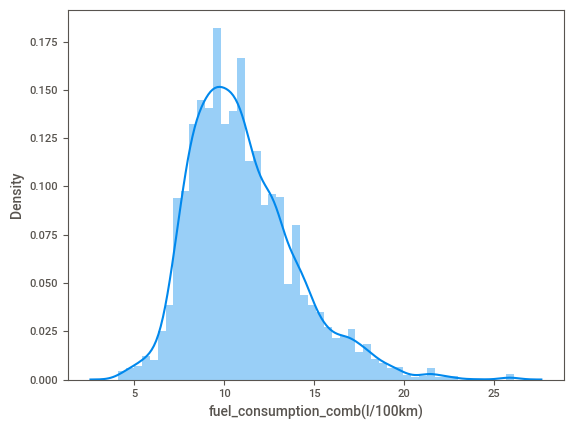

In [39]:
sns.distplot(df1['fuel_consumption_comb(l/100km)'])
plt.show()

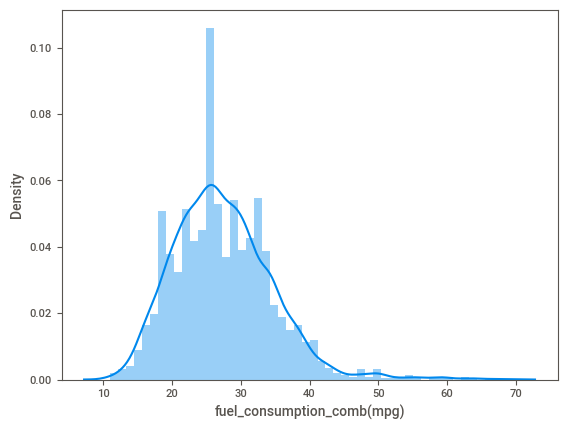

In [40]:
sns.distplot(df1['fuel_consumption_comb(mpg)'])
plt.show()

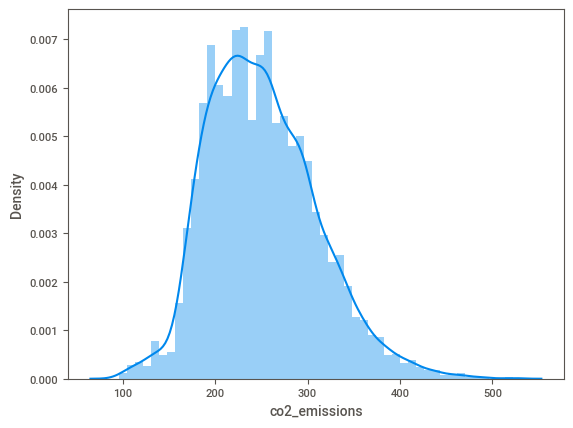

In [41]:
sns.distplot(df1['co2_emissions'])
plt.show()

In [42]:
#Converting String/Object to Numeric

df1['make'] = pd.to_numeric(df1['make'])
df1['model'] = pd.to_numeric(df1['model'])
df1['vehicle_class'] = pd.to_numeric(df1['vehicle_class'])
df1['transmission'] = pd.to_numeric(df1['transmission'])
df1['fuel_type'] = pd.to_numeric(df1['fuel_type'])

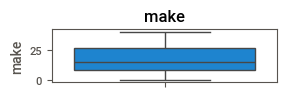

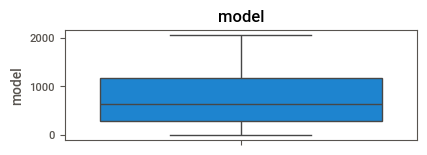

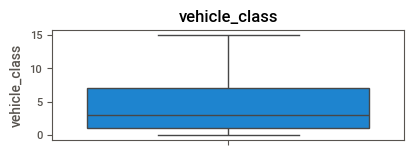

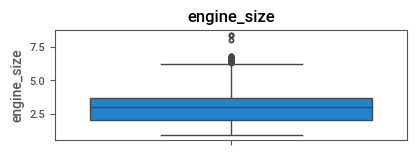

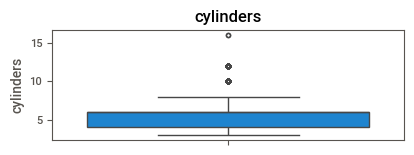

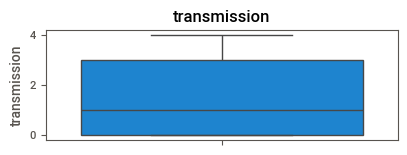

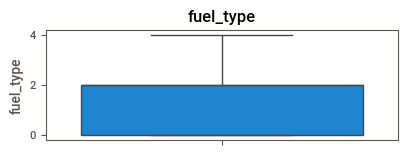

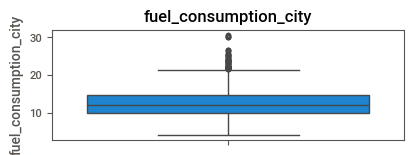

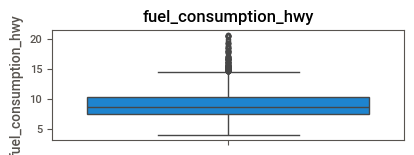

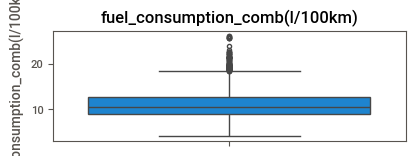

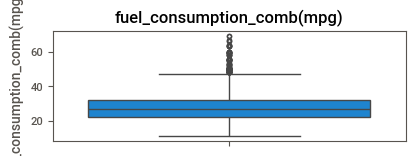

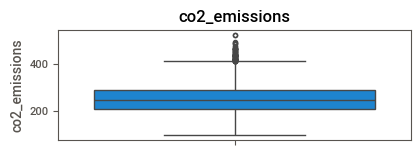

<Figure size 1000x1000 with 0 Axes>

In [43]:
#Boxplot

#For Loop

col = ['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions']

c=1
for i in col:
    plt.subplot(6,2,c)
    sns.boxplot(df1[i])
    plt.title(i)
    c=c+1
    plt.figure(figsize=(10,10))

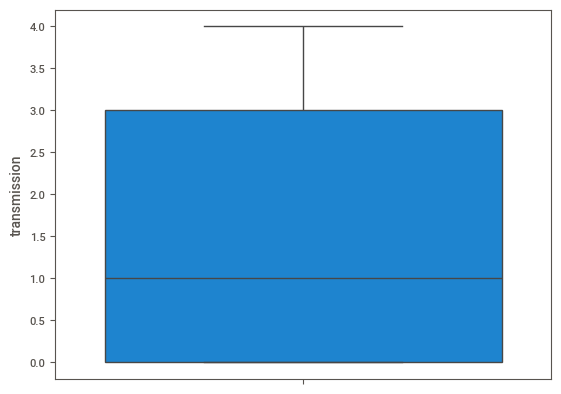

In [44]:
sns.boxplot(df1['transmission'])
plt.show()

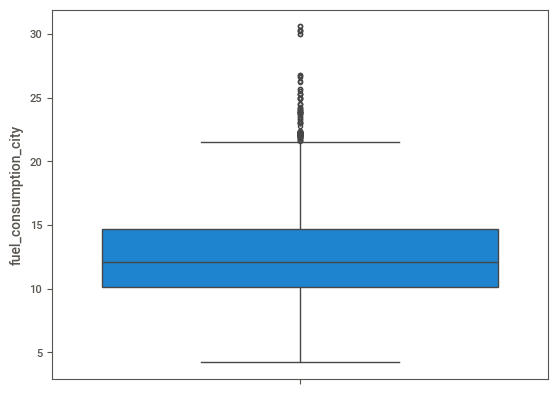

In [45]:
sns.boxplot(df1['fuel_consumption_city'])
plt.show()

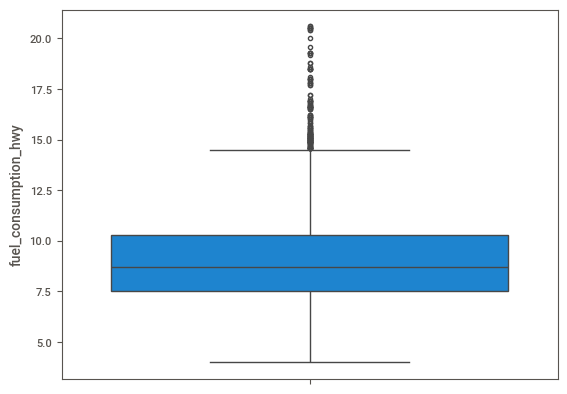

In [46]:
sns.boxplot(df1['fuel_consumption_hwy'])
plt.show()

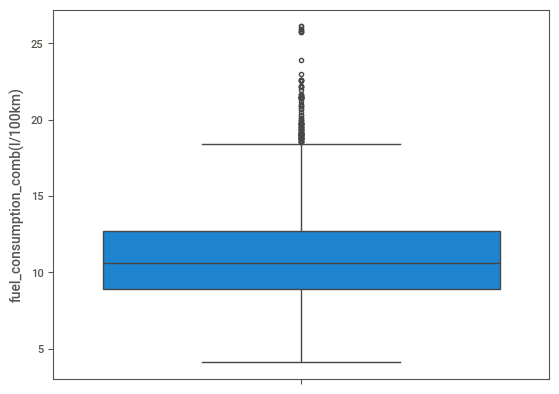

In [47]:
sns.boxplot(df1['fuel_consumption_comb(l/100km)'])
plt.show()

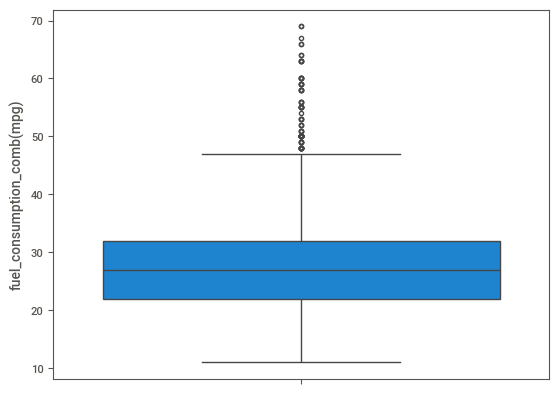

In [48]:
sns.boxplot(df1['fuel_consumption_comb(mpg)'])
plt.show()

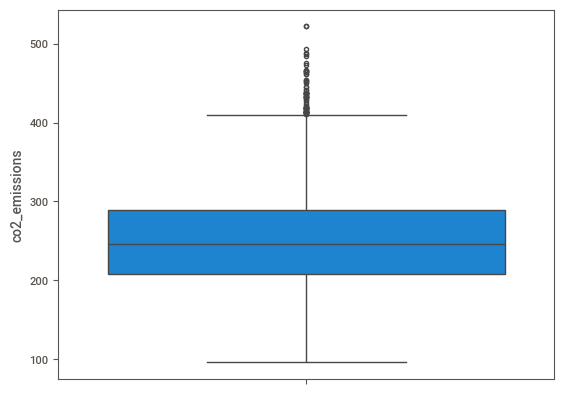

In [49]:
sns.boxplot(df1['co2_emissions'])
plt.show()

In [50]:
#Outliers handling for fuel_consumtion_city

q1 = np.percentile(df1['fuel_consumption_city'],25)
q3 = np.percentile(df1['fuel_consumption_city'],75)
print(q1,q3)

iqr = q3-q1
print(iqr)

upper = q3+1.5*iqr #Formula
lower = q1 - 1.5*iqr #Formula
print(upper,lower)

df1['fuel_consumption_city'][df1['fuel_consumption_city']>upper]=upper
df1['fuel_consumption_city'][df1['fuel_consumption_city']<lower]=lower

10.1 14.7
4.6
21.599999999999998 3.2


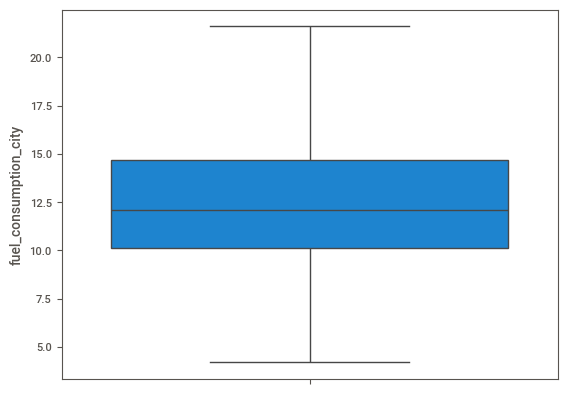

In [51]:
sns.boxplot(df1['fuel_consumption_city'])
plt.show()

In [52]:
#Outliers handling for fuel_consumption_hwy

q1 = np.percentile(df1['fuel_consumption_hwy'],25)
q3 = np.percentile(df1['fuel_consumption_hwy'],75)
print(q1,q3)

iqr = q3-q1
print(iqr)

upper = q3+1.5*iqr #Formula
lower = q1 - 1.5*iqr #Formula
print(upper,lower)

df1['fuel_consumption_hwy'][df1['fuel_consumption_hwy']>upper]=upper
df1['fuel_consumption_hwy'][df1['fuel_consumption_hwy']<lower]=lower

7.5 10.3
2.8000000000000007
14.500000000000002 3.299999999999999


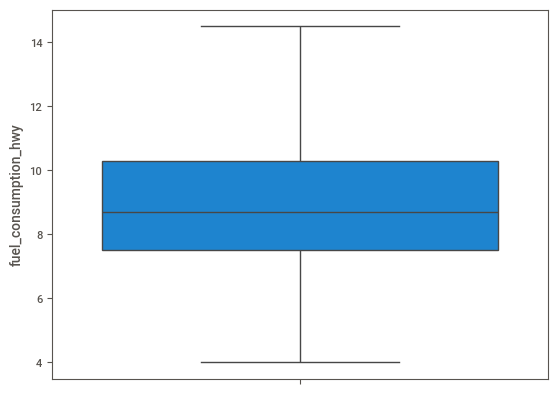

In [53]:
sns.boxplot(df1['fuel_consumption_hwy'])
plt.show()

In [54]:
#Outliers handling for fuel_consumption_comb(l/100km)

q1 = np.percentile(df1['fuel_consumption_comb(l/100km)'],25)
q3 = np.percentile(df1['fuel_consumption_comb(l/100km)'],75)
print(q1,q3)

iqr = q3-q1
print(iqr)

upper = q3+1.5*iqr #Formula
lower = q1 - 1.5*iqr #Formula
print(upper,lower)

df1['fuel_consumption_comb(l/100km)'][df1['fuel_consumption_comb(l/100km)']>upper]=upper
df1['fuel_consumption_comb(l/100km)'][df1['fuel_consumption_comb(l/100km)']<lower]=lower

8.9 12.7
3.799999999999999
18.4 3.200000000000002


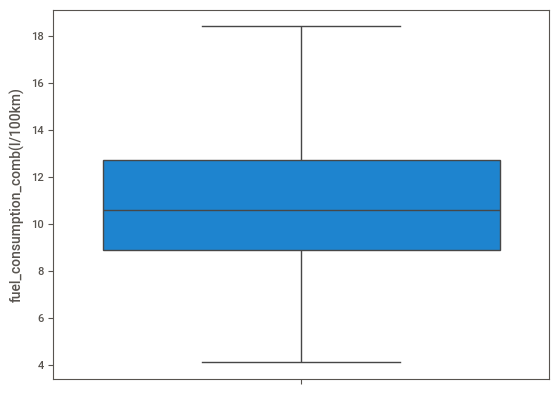

In [55]:
sns.boxplot(df1['fuel_consumption_comb(l/100km)'])
plt.show()

In [56]:
#Outliers handling for fuel_consumption_comb(mpg)

q1 = np.percentile(df1['fuel_consumption_comb(mpg)'],25)
q3 = np.percentile(df1['fuel_consumption_comb(mpg)'],75)
print(q1,q3)

iqr = q3-q1
print(iqr)

upper = q3+1.5*iqr #Formula
lower = q1 - 1.5*iqr #Formula
print(upper,lower)

df1['fuel_consumption_comb(mpg)'][df1['fuel_consumption_comb(mpg)']>upper]=upper
df1['fuel_consumption_comb(mpg)'][df1['fuel_consumption_comb(mpg)']<lower]=lower

22.0 32.0
10.0
47.0 7.0


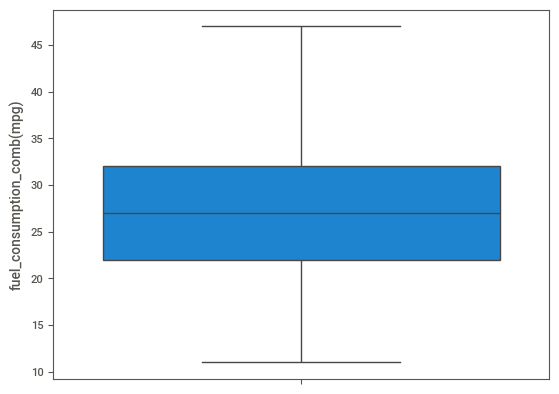

In [57]:
sns.boxplot(df1['fuel_consumption_comb(mpg)'])
plt.show()

In [58]:
#Outliers handling for co2_emissions

q1 = np.percentile(df1['co2_emissions'],25)
q3 = np.percentile(df1['co2_emissions'],75)
print(q1,q3)

iqr = q3-q1
print(iqr)

upper = q3+1.5*iqr #Formula
lower = q1 - 1.5*iqr #Formula
print(upper,lower)

df1['co2_emissions'][df1['co2_emissions']>upper]=upper
df1['co2_emissions'][df1['co2_emissions']<lower]=lower

208.0 289.0
81.0
410.5 86.5


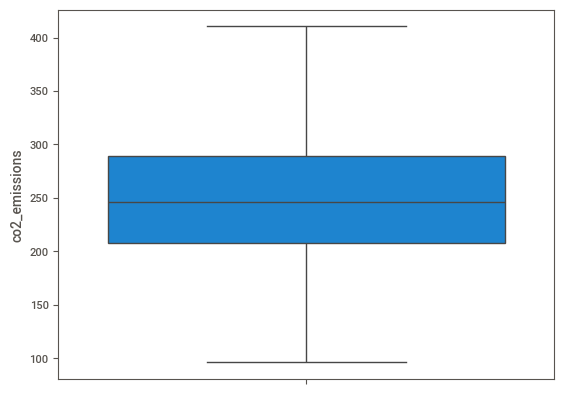

In [59]:
sns.boxplot(df1['co2_emissions'])
plt.show()

# ***Feature Selection***

In [60]:
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [61]:
#Renaming some columns

df1.rename(columns = {'fuel_consumption_comb(l/100km)': 'fuel_consumption_combo', 'fuel_consumption_comb(mpg)': 'fuel_consumption_comb_MPG'}, inplace = True)
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_combo',
       'fuel_consumption_comb_MPG', 'co2_emissions'],
      dtype='object')

In [62]:
#Feature Extraction using SelectKBest Method

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest #Import SelectKBest Function
from sklearn.feature_selection import f_regression

#Splitting the data into Independent and Dependent Variables
array = df1.values
X = df1.iloc[:,0:11]
Y = df1['co2_emissions']

#Feature Extraction
test = SelectKBest(score_func = f_regression, k = 11)
fit = test.fit(X,Y)

#summarize scores
set_printoptions(precision=3)
pd.options.display.float_format = '{:.2f}'.format
print(fit.scores_)
features = fit.transform(X)
#highest values are the most important features

[1.392e+02 5.298e-01 1.266e+03 1.730e+04 1.432e+04 1.122e+02 2.065e+02
 3.705e+04 2.741e+04 3.826e+04 3.845e+04]


In [63]:
#List of numbers in scientific notation
numbers = [1.392e+02, 5.298e-01, 1.266e+03, 1.730e+04, 1.432e+04, 1.122e+02, 2.065e+02,
 3.705e+04, 2.741e+04, 3.826e+04, 3.845e+04]

normal_strs = []

for number in numbers:
    formatted_number = f"{number:f}"
    normal_strs.append(formatted_number)

normal_strs

['139.200000',
 '0.529800',
 '1266.000000',
 '17300.000000',
 '14320.000000',
 '112.200000',
 '206.500000',
 '37050.000000',
 '27410.000000',
 '38260.000000',
 '38450.000000']

In [64]:
# Feature Importance using Decision Trees
from sklearn.tree import  DecisionTreeRegressor

#Feature extraction
model = DecisionTreeRegressor() #Building DT Model
model.fit(X,Y) #Fitting Independent and Dependent variable into the DT Model

print(model.feature_importances_) #Checking important/relevant Features
#highest values are the most important features

[5.722e-04 8.877e-04 1.689e-03 2.002e-03 9.573e-05 2.395e-04 5.722e-02
 3.197e-02 7.655e-04 2.759e-01 6.287e-01]


In [65]:
#List of numbers in scientific notation
numbers = [5.255e-04, 7.090e-04, 1.771e-03, 1.630e-03, 1.316e-04, 2.163e-04, 5.746e-02,
 3.215e-02, 8.383e-04, 8.986e-01, 5.931e-03]

normal_strss = []

for number in numbers:
    formatted_number = f"{number:f}"
    normal_strss.append(formatted_number)

normal_strss

['0.000526',
 '0.000709',
 '0.001771',
 '0.001630',
 '0.000132',
 '0.000216',
 '0.057460',
 '0.032150',
 '0.000838',
 '0.898600',
 '0.005931']

In [66]:
#Feature Extraction with Recursive Feature Elimination
from sklearn.feature_selection import RFE

#Feature extraction
model = DecisionTreeRegressor() #Building DT Model
rfe = RFE(model) #applying RFE method
fit = rfe.fit(X,Y) #fitting the RFE method

print('Total Best Features are:',fit.n_features_)
print(fit.ranking_)

Total Best Features are: 5
[5 3 2 1 7 6 1 1 4 1 1]


In [67]:
# Creating Empty DataFrame and Storing it in variable df
fi = pd.DataFrame()
fi['Features'] = df1.columns.drop('co2_emissions')
fi['SelectKBest Values'] = normal_strs
fi['DT Values'] = normal_strss
fi['RFE'] = fit.ranking_
fi

Features SelectKBest Values DT Values  RFE
0                        make         139.200000  0.000526    5
1                       model           0.529800  0.000709    3
2               vehicle_class        1266.000000  0.001771    2
3                 engine_size       17300.000000  0.001630    1
4                   cylinders       14320.000000  0.000132    7
5                transmission         112.200000  0.000216    6
6                   fuel_type         206.500000  0.057460    1
7       fuel_consumption_city       37050.000000  0.032150    1
8        fuel_consumption_hwy       27410.000000  0.000838    4
9      fuel_consumption_combo       38260.000000  0.898600    1
10  fuel_consumption_comb_MPG       38450.000000  0.005931    1

In [68]:
fi.dtypes

Features              object
SelectKBest Values    object
DT Values             object
RFE                    int64
dtype: object

In [69]:
fi['SelectKBest Values'] = pd.to_numeric(fi['SelectKBest Values'])
fi['DT Values'] = pd.to_numeric(fi['DT Values'])
print(fi.dtypes)

Features               object
SelectKBest Values    float64
DT Values             float64
RFE                     int64
dtype: object


In [70]:
fi['SelectKBest Values'].sort_values(ascending = False)

#Top 6 Important Features using SelectKBest Method

#Fuel Consumption Comb/MPG --> 38450
#Fuel Consumption Combo    --> 38260
#Fuel Consumption City     --> 37050
#Fuel Consumption Hwy      --> 27410
#Engine Size               --> 17300
#Cylinders                 --> 14320

10   38450.00
9    38260.00
7    37050.00
8    27410.00
3    17300.00
4    14320.00
2     1266.00
6      206.50
0      139.20
5      112.20
1        0.53
Name: SelectKBest Values, dtype: float64

In [71]:
fi['DT Values'].sort_values(ascending = False)

#Using DT Top 4 Important Features are,

#fuel_consumption_combo     -->0.90
#fuel_type                  -->0.06
#fuel_consumption_city      -->0.03
#fuel_consumption_comb_MPG  -->0.01

9    0.90
6    0.06
7    0.03
10   0.01
2    0.00
3    0.00
8    0.00
1    0.00
0    0.00
5    0.00
4    0.00
Name: DT Values, dtype: float64

In [72]:
fi[fi['RFE'] == 1]

#Top 5 Best Features using (Recursive Feature Elimination) RFE,

#engine_size
#fuel_type
#fuel_consumption_city
#fuel_consumption_combo
#fuel_consumption_comb_MPG

Features  SelectKBest Values  DT Values  RFE
3                 engine_size            17300.00       0.00    1
6                   fuel_type              206.50       0.06    1
7       fuel_consumption_city            37050.00       0.03    1
9      fuel_consumption_combo            38260.00       0.90    1
10  fuel_consumption_comb_MPG            38450.00       0.01    1

# ***Regularization***

In [73]:
#Ridge Regularization
#import ridge regression from sklearn library

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#Splitting the Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Train the model

ridgeR = Ridge(alpha = 1) #Creating Ridge Model with alpha or lamda = 1

ridgeR.fit(X_train, Y_train) #Fitted on training dataset

Y_pred = ridgeR.predict(X_test) #Prediction on testing data (xtest)

#calculate mean square error

#mean_squared_error_ridge = np.mean((y_pred - Y_test)**2) #Total loss or error by comparing predicted values with actual values
#print(mean_squared_error_ridge)

rmse_R = sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse_R)

#get Ridge coefficient and print them

ridge_coefficient = pd.DataFrame() #Creating Empty Dataframe
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)

# Evaluate the model
r_squared_R = r2_score(Y_test, Y_pred)
print(f"R squared value with Ridge Regression: {r_squared_R}")

#We are getting the loss or error of 301.58

17.366273862063387
R squared value with Ridge Regression: 0.9123874637603875


In [74]:
ridge_coefficient['Coefficient Estimate'].sort_values(ascending = False)

9     8.68
3     6.33
4     4.16
8     2.52
2     0.56
0     0.06
1     0.00
5    -0.45
10   -3.46
7    -3.62
6    -5.80
Name: Coefficient Estimate, dtype: float64

# ***Model Building*** ****After Feature Selection***

In [75]:
x = df1[['engine_size','cylinders','fuel_type','fuel_consumption_hwy','fuel_consumption_comb_MPG']]
y = df1['co2_emissions']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [77]:
#Building Model using OLS Method

import statsmodels.formula.api as smf
import statsmodels.api as sm

#model = smf.ols(y_train,x_train).fit()
#model.summary()

# Build a MLR regression model
model = smf.ols(formula="Y ~ " + "+".join(x_train.columns), data=pd.DataFrame(data={"Y": y_train, **x_train})).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:22:07   Log-Likelihood:                -21149.
No. Observations:                5018   AIC:                         4.231e+04
Df Residuals:                    5012   BIC:                         4.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [78]:
model.pvalues

Intercept                   0.00
engine_size                 0.00
cylinders                   0.00
fuel_type                   0.00
fuel_consumption_hwy        0.00
fuel_consumption_comb_MPG   0.00
dtype: float64

In [79]:
np.round((model.rsquared)*100,2)

92.05

In [80]:
model.params

Intercept                   239.43
engine_size                   6.67
cylinders                     4.23
fuel_type                    -5.62
fuel_consumption_hwy          7.94
fuel_consumption_comb_MPG    -3.61
dtype: float64

In [81]:
print(model.aic,model.bic)

42310.65054729387 42349.77526765543


In [82]:
model.resid

1372    3.24
1520    9.84
952    -1.84
3189   -1.47
2153    3.68
        ... 
4036    1.03
5899    4.58
5936   16.00
6134    4.36
860    -3.37
Length: 5018, dtype: float64

# ***Model Validation Technique***

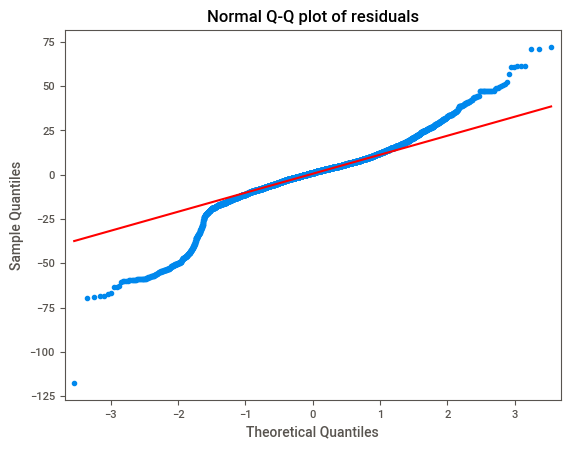

In [83]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Most of the information is lying on the Quantile-Quantile Line and some of the info is lying outside of the line.

### ***Residual Plot (Homoscadasticity)***

In [84]:
#Creating method for Standardizing (Z-Score) the fitted values (predicted values) and residuals values (errors values)

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

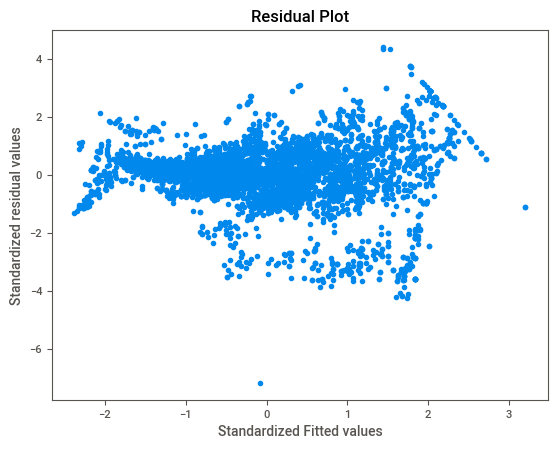

In [85]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# ***Residuals vs Regressors***


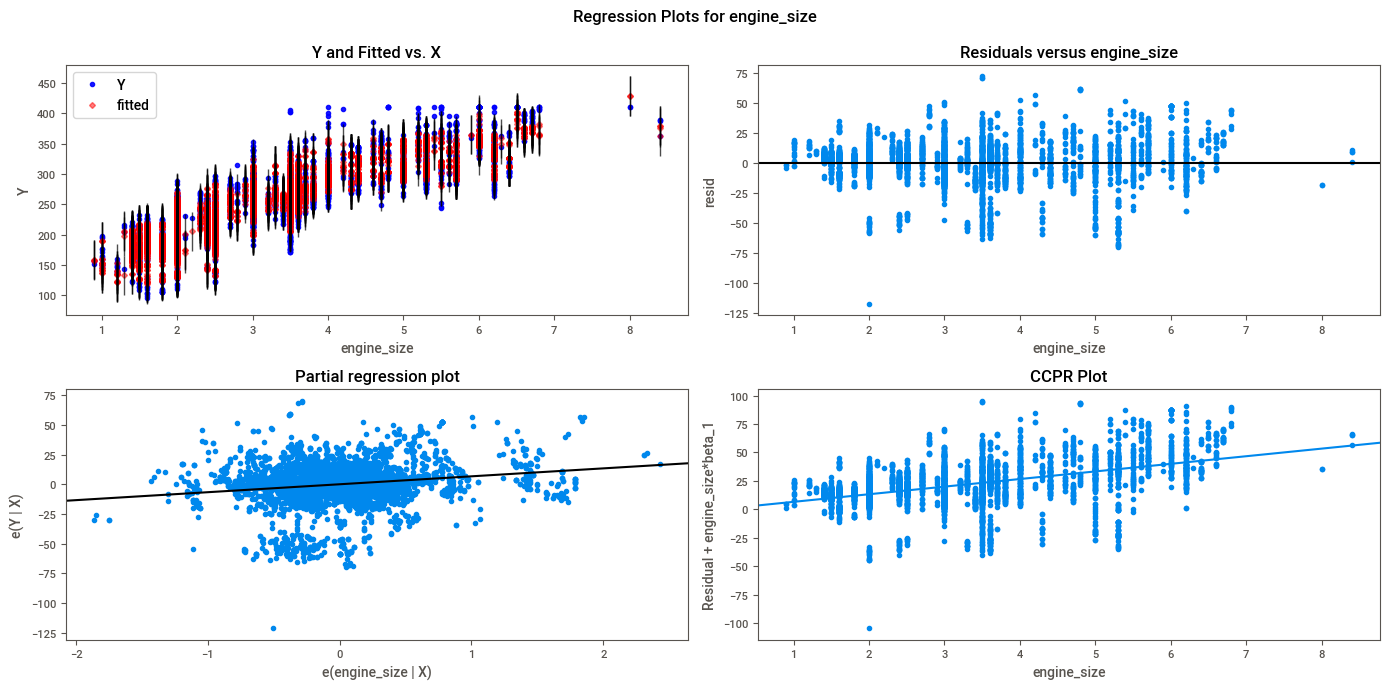

In [86]:
#To check how residuals are behaving with 'engine_size' regressor(independent variables)

#Residuals vs Regressor (engine_size)
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model,"engine_size",fig=fig)
plt.show()

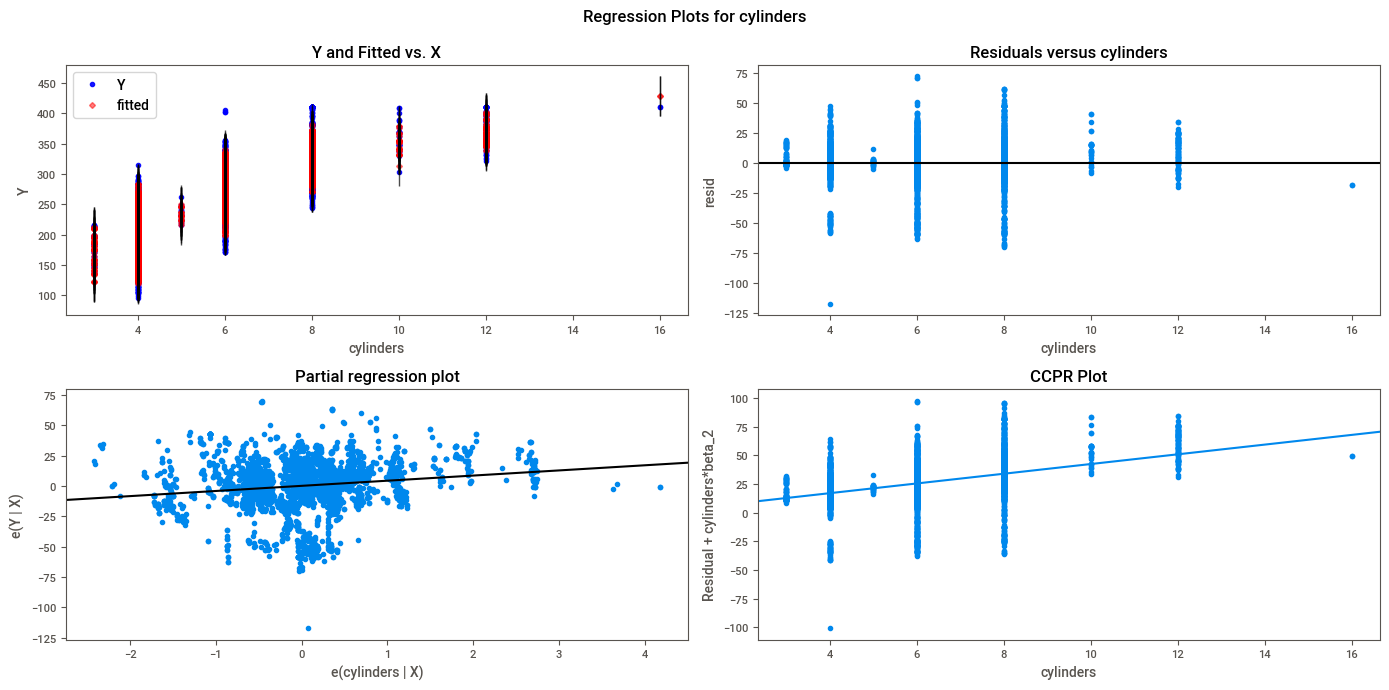

In [87]:
#To check how residuals are behaving with 'cylinders' regressor(independent variables)

#Residuals vs Regressor (cylinders)
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model,"cylinders",fig=fig)
plt.show()

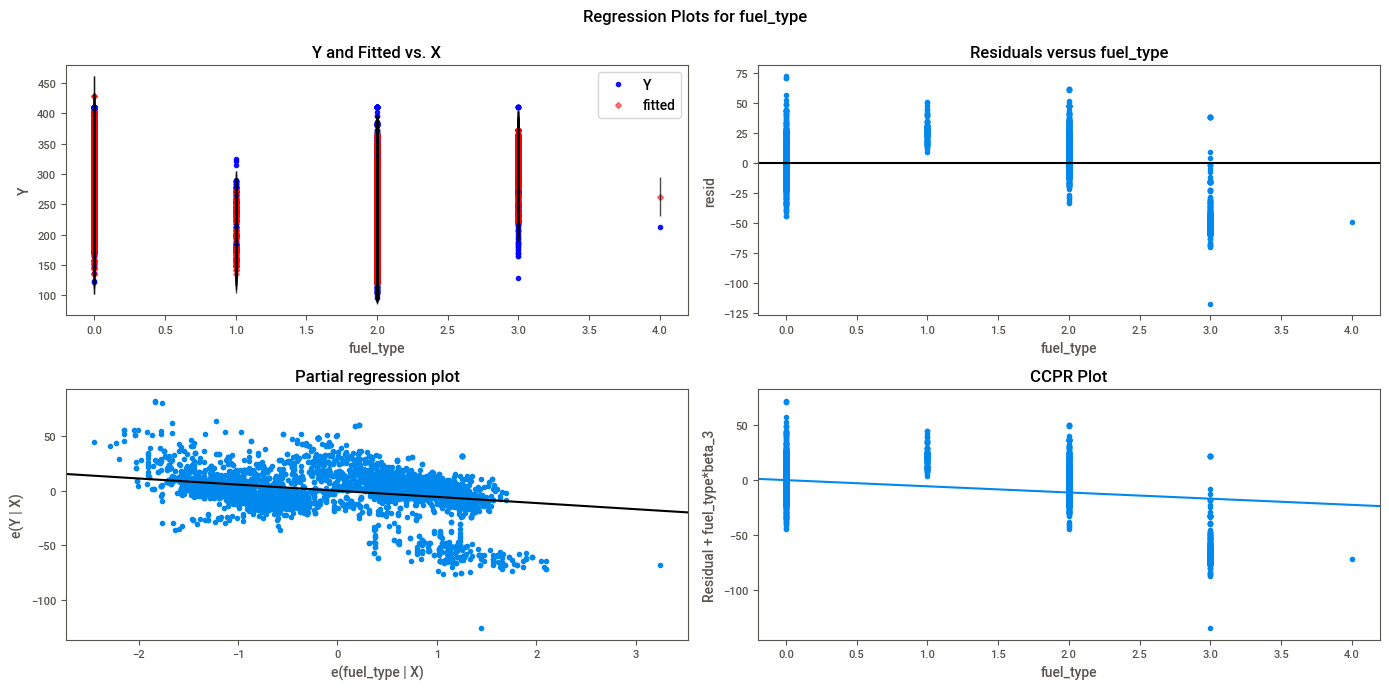

In [88]:
#To check how residuals are behaving with 'fuel_type' regressor(independent variables)

#Residuals vs Regressor (fuel_type)
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model,"fuel_type",fig=fig)
plt.show()

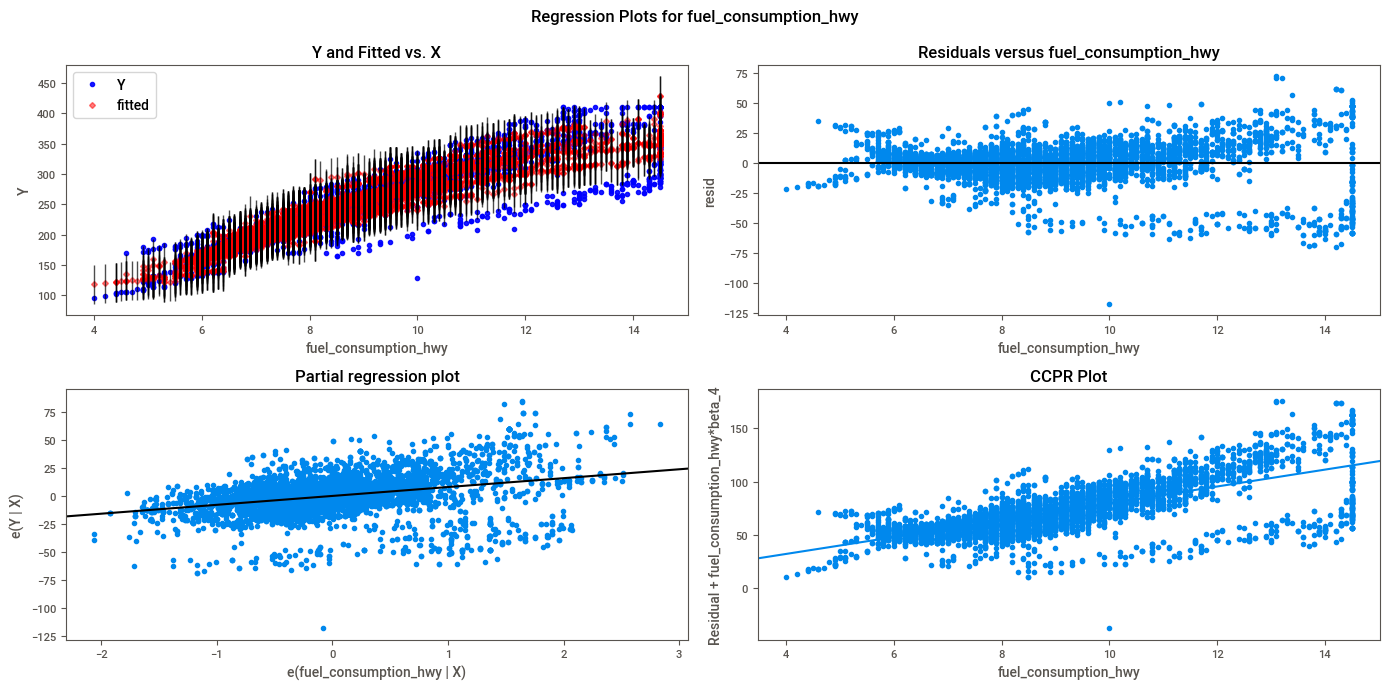

In [89]:
#To check how residuals are behaving with 'fuel_consumption_hwy' regressor(independent variables)

#Residuals vs Regressor (fuel_consumption_hwy)
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model,"fuel_consumption_hwy",fig=fig)
plt.show()

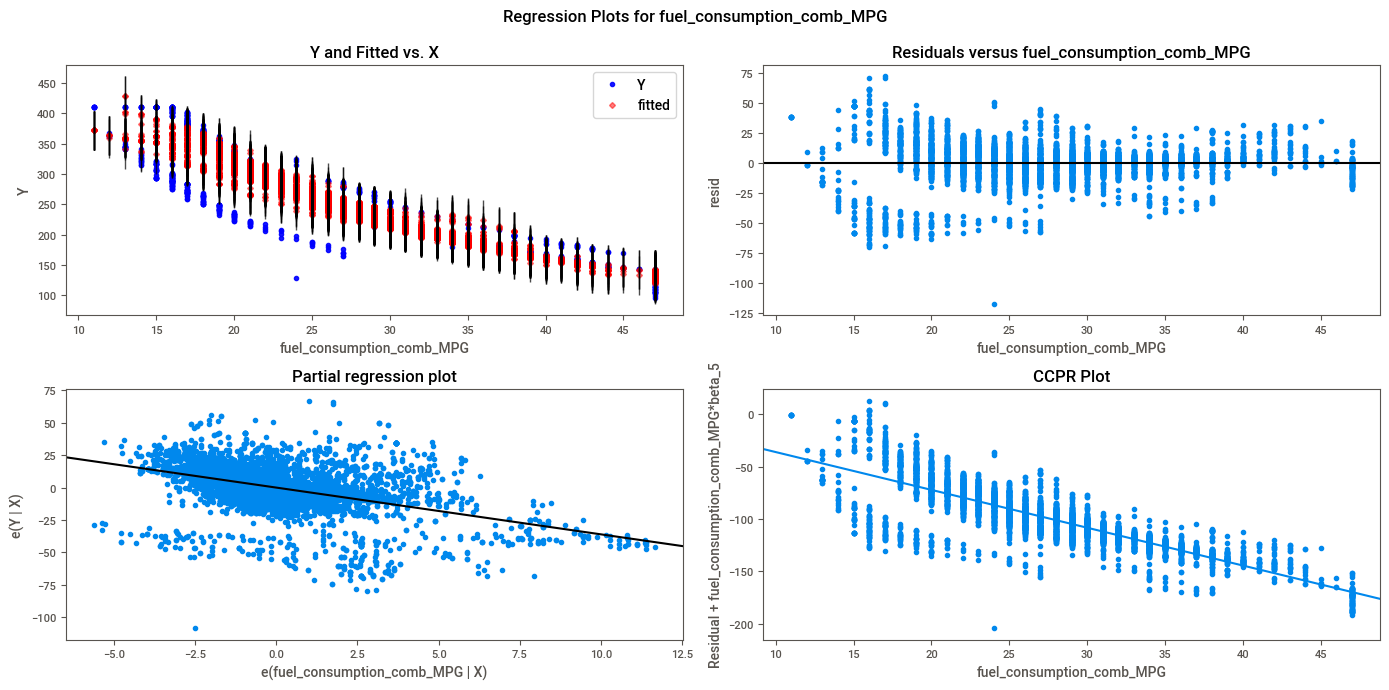

In [90]:
#To check how residuals are behaving with 'fuel_consumption_comb_MPG' regressor(independent variables)

#Residuals vs Regressor (fuel_consumption_comb_MPG)
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model,"fuel_consumption_comb_MPG",fig=fig)
plt.show()

# ***Model Deletion Diagnostic***

# ****Detecting Outliers****

In [91]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

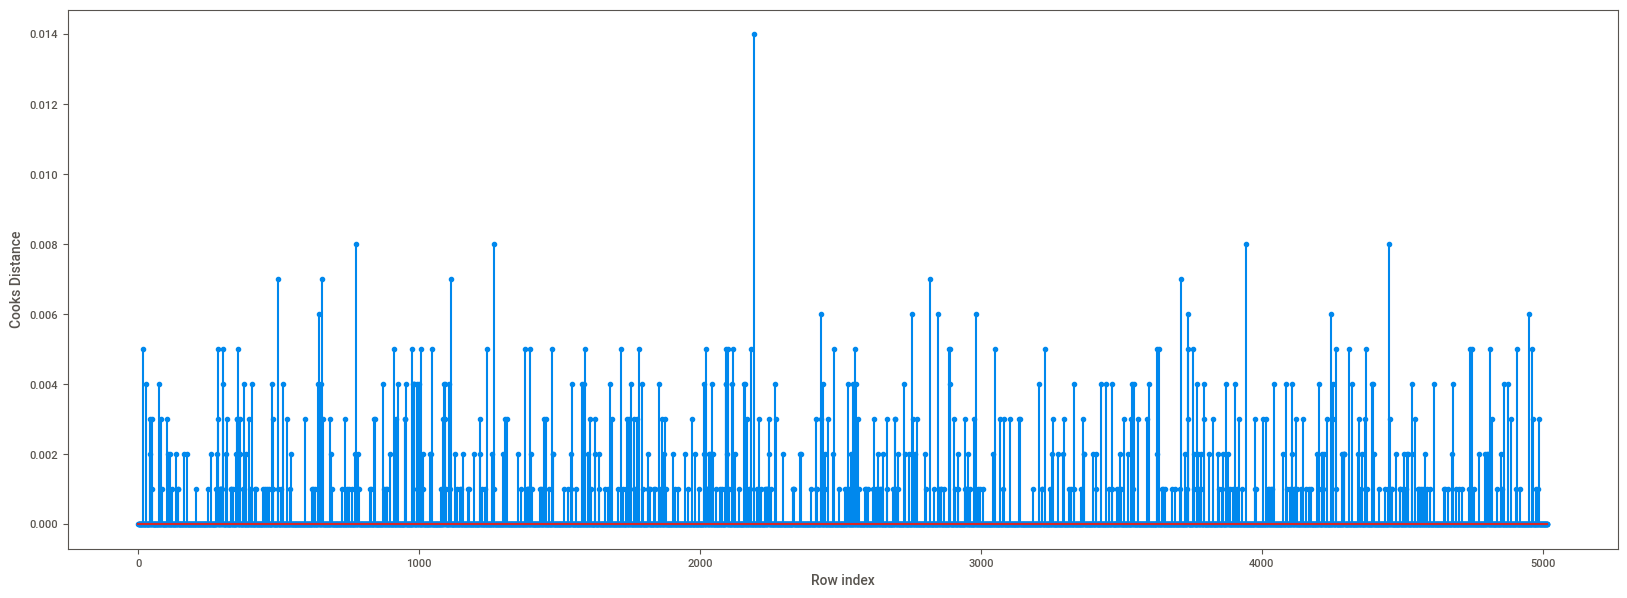

In [92]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

#No observation is going beyond value of 1 in Cooks Distance.

In [93]:
#No Outliers present in data as it is not showing in Stem Plot using Cooks Distance.
#So we can use this model for prediction.

(np.argmax(c_V),np.max(c_V))

(2191, 0.013660362196269224)

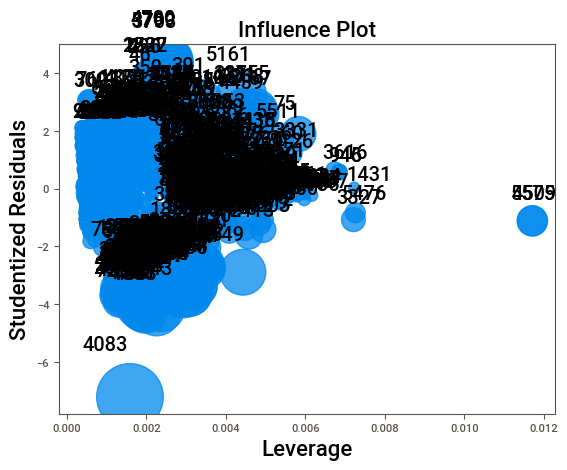

0.0028694404591104736


In [94]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

k = 5
n = df1.shape[0]

leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

# ***Applying Isolation Forest***

In [95]:
df1.shape

(6273, 12)

In [96]:
print(df1.columns)

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_combo',
       'fuel_consumption_comb_MPG', 'co2_emissions'],
      dtype='object')


In [98]:
#Isolation Forest - to detect and remove outliers

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

model_iso = IsolationForest(random_state = 42)
model_iso.fit(df1)

df1['anomaly_scores'] = model_iso.decision_function(df1)
df1['anomaly'] = model_iso.predict(df1)

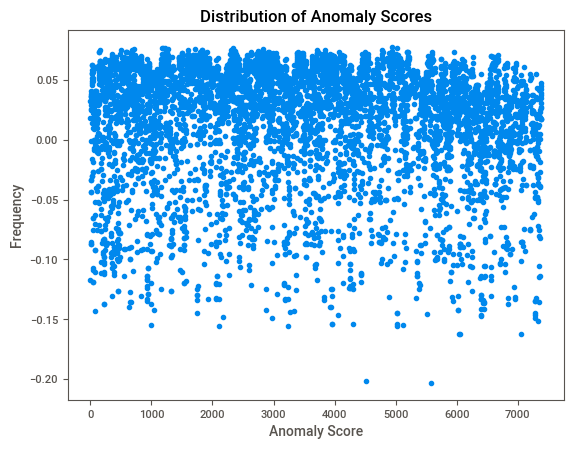

In [99]:
# Visualize Outliers/Anomalies

plt.plot(df1['anomaly_scores'], 'o')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

In [100]:
df1.shape

(6273, 14)

In [101]:
#Dropping Outliers

def drop_anomalies(df1):
    # Drop observations where 'anomaly' column is equal to -1
    cleaned_dataframe = df1[df1['anomaly'] != -1]
    return cleaned_dataframe

df2 = drop_anomalies(df1)

In [102]:
df2.shape

(4554, 14)

In [103]:
df2 = df2.reset_index()
del df2['index']

In [104]:
df2

make  model  vehicle_class  engine_size  cylinders  transmission  \
0        0      0              0         2.00          4             0   
1        0      0              0         2.40          4             1   
2        0      2              1         3.50          6             0   
3        0      3              1         3.50          6             0   
4        0      4              2         3.50          6             0   
...    ...    ...            ...          ...        ...           ...   
4549    39   1923              1         2.00          4             0   
4550    39    885              1         2.00          4             0   
4551    39    887              1         2.00          4             0   
4552    39   1067              8         2.00          4             0   
4553    39   1068              8         2.00          4             0   

      fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0             0                   9.90                  6.70   
1             0                  11.20                  7.70   
2             0                  12.70                  9.10   
3             0                  12.10                  8.70   
4             0                  11.90                  7.70   
...         ...                    ...                   ...   
4549          0                  10.70                  7.70   
4550          0                  11.20                  8.30   
4551          0                  11.70                  8.60   
4552          0                  11.20                  8.30   
4553          0                  12.20                  8.70   

      fuel_consumption_combo  fuel_consumption_comb_MPG  co2_emissions  \
0                       8.50                         33         196.00   
1                       9.60                         29         221.00   
2                      11.10                         25         255.00   
3                      10.60                         27         244.00   
4                      10.00                         28         230.00   
...                      ...                        ...            ...   
4549                    9.40                         30         219.00   
4550                    9.90                         29         232.00   
4551                   10.30                         27         240.00   
4552                    9.90                         29         232.00   
4553                   10.70                         26         248.00   

      anomaly_scores  anomaly  
0               0.02        1  
1               0.03        1  
2               0.04        1  
3               0.04        1  
4               0.04        1  
...              ...      ...  
4549            0.02        1  
4550            0.04        1  
4551            0.04        1  
4552            0.03        1  
4553            0.02        1  

[4554 rows x 14 columns]

In [105]:
df2.drop(df2[['anomaly_scores','anomaly']], axis = 1, inplace = True)
print(df2.head(2))

   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0      0              0         2.00          4             0   
1     0      0              0         2.40          4             1   

   fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0          0                   9.90                  6.70   
1          0                  11.20                  7.70   

   fuel_consumption_combo  fuel_consumption_comb_MPG  co2_emissions  
0                    8.50                         33         196.00  
1                    9.60                         29         221.00  


In [106]:
df2.shape

(4554, 12)

In [107]:
#converting cleaned data to CSV
#df2.to_csv("co2_emissions_cleaned.csv", sep = ';')

# Building Model Again after removing outliers

In [108]:
x = df2[['engine_size','fuel_type','cylinders','fuel_consumption_hwy','fuel_consumption_comb_MPG']]
y = df2['co2_emissions']

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [110]:
#Building Model using OLS Method

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Build a MLR regression model
model_ = smf.ols(formula="Y ~ " + "+".join(x_train.columns), data=pd.DataFrame(data={"Y": y_train, **x_train})).fit()

# Print the model summary
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:22:46   Log-Likelihood:                -12170.
No. Observations:                3643   AIC:                         2.435e+04
Df Residuals:                    3637   BIC:                         2.439e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [111]:
model_.pvalues

Intercept                   0.00
engine_size                 0.00
fuel_type                   0.00
cylinders                   0.00
fuel_consumption_hwy        0.00
fuel_consumption_comb_MPG   0.00
dtype: float64

In [112]:
model_.params

Intercept                   251.67
engine_size                   1.71
fuel_type                     0.46
cylinders                     3.73
fuel_consumption_hwy         10.37
fuel_consumption_comb_MPG    -4.40
dtype: float64

In [113]:
np.round(model_.rsquared,2)

0.97

In [114]:
print(model_.aic,model_.bic)

24352.946705405153 24390.150082187203


In [115]:
model_.resid

3955   12.46
3829    2.18
3285   -3.42
3665    4.05
2155   -6.87
        ... 
4426   -5.92
466    -5.64
3092    4.25
3772   -5.01
860    -4.94
Length: 3643, dtype: float64

# ***Model Validation***

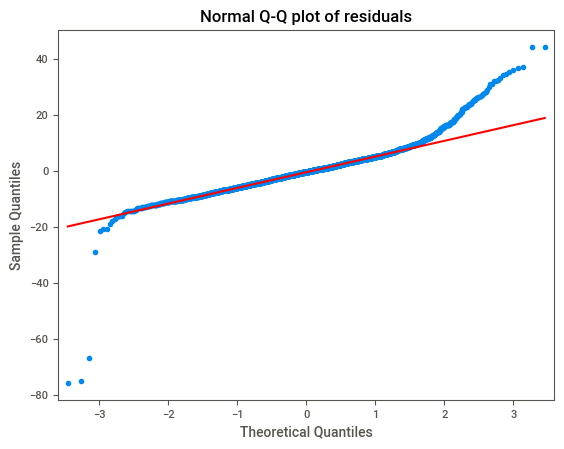

In [116]:
#Quantile-Quantile Plot

qqplot = sm.qqplot(model_.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Most of the information is lying on the Quantile-Quantile Line and some of the info is lying outside of the line.

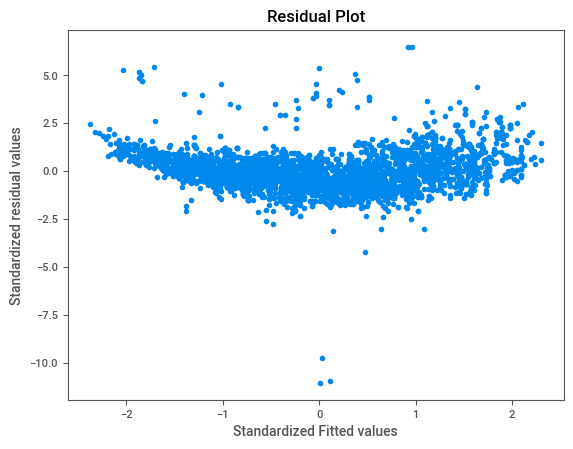

In [117]:
#Residuals Plot

plt.scatter(get_standardized_values(model_.fittedvalues),
            get_standardized_values(model_.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Most of the Standardized Residuals are around Zero Mean (0) value and they're having constant variance from mean value.(NO PATTERNS)

# ***Prediction***

In [118]:
y_pred_mlr_ = model_.predict(x_test)
y_pred_mlr_.head()

471    282.89
1971   244.44
23     287.66
2702   270.97
135    176.69
dtype: float64

In [119]:
y_test.head()

471    301.00
1971   248.00
23     288.00
2702   280.00
135    179.00
Name: co2_emissions, dtype: float64

#### RMSE Error

In [120]:
#Total error

rmse_mlr_ = sqrt(mean_squared_error(y_test, y_pred_mlr_))
print(rmse_mlr_)

6.896892654199797


# ***Model 2***

#### Let's see if we can improve the accuracy by changing the Model/Algorithm.

# ***Random Forest***

In [121]:
df1.shape

(6273, 14)

In [122]:
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

math.sqrt(12)

3.4641016151377544

In [123]:
#x = df1.drop('co2_emissions',axis = 1)
#y = df1['co2_emissions']

In [124]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=42)

In [125]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=42, shuffle = True)

#Random Forest Model
model2 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features, random_state=42)

#Average of sub-samples (total 10 samples)
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.992510619555697


In [126]:
model2.fit(x_train,y_train)

RandomForestRegressor(max_features=5, random_state=42)

In [127]:
#Random Forest Testing Accuracy

model2.score(x_test,y_test)

0.9923319409796735

In [128]:
#Random Forest Training Accuracy

model2.score(x_train,y_train)

0.9968696343384358

In [129]:
y_pred2 = model2.predict(x_test)
y_pred2

array([293.561, 244.561, 288.892, 279.295, 182.09 , 228.209, 254.42 ,
       189.337, 274.646, 194.033, 206.141, 293.244, 226.923, 205.304,
       264.661, 223.198, 227.601, 301.462, 285.781, 204.145, 194.14 ,
       213.412, 206.883, 181.198, 243.207, 219.142, 177.874, 229.505,
       220.223, 197.833, 191.401, 186.065, 293.176, 168.958, 216.751,
       285.781, 306.791, 285.113, 213.508, 189.314, 311.   , 177.912,
       220.355, 273.323, 221.848, 231.817, 189.313, 185.912, 227.697,
       205.982, 226.237, 233.699, 166.298, 194.033, 284.171, 249.027,
       220.571, 210.069, 233.   , 226.274, 241.319, 212.608, 245.445,
       290.193, 203.604, 234.341, 176.964, 213.628, 254.796, 210.058,
       260.902, 244.192, 260.855, 263.576, 219.906, 312.75 , 194.822,
       211.282, 207.866, 225.928, 178.18 , 317.   , 310.191, 195.182,
       201.574, 286.39 , 191.775, 217.705, 257.712, 245.097, 252.325,
       244.661, 197.734, 315.662, 274.591, 284.231, 236.771, 241.419,
       205.982, 244.

In [130]:
y_test

471    301.00
1971   248.00
23     288.00
2702   280.00
135    179.00
        ...  
2110   204.00
2957   266.00
408    225.00
170    317.00
540    179.00
Name: co2_emissions, Length: 911, dtype: float64

In [131]:
#Accuracy of our RF Model

r2_score(y_test,y_pred2)

0.9923319409796735

In [132]:
#Total Error/Residuals

rmse_RF = sqrt(mean_squared_error(y_test, y_pred2))
print(rmse_RF)

3.5727119610731144


# ***Model 3***

# ***Decision Tree***

In [133]:
#Building the Model
model3 = DecisionTreeRegressor(max_depth = 4, random_state = 42)

#Fitting the training dataset into Decision Tree Model
model3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [134]:
#Find the testing accuracy

model3.score(x_test,y_test)

0.974572162611983

In [135]:
#Find the training accuracy

model3.score(x_train, y_train)

0.9808609287682024

In [136]:
y_pred3 = model3.predict(x_test)
y_pred3

array([298.98 , 240.23 , 286.701, 274.495, 185.771, 227.764, 253.698,
       185.771, 274.495, 194.261, 203.094, 298.98 , 227.764, 203.094,
       262.549, 227.764, 227.764, 298.98 , 286.701, 203.094, 194.261,
       215.915, 203.094, 185.771, 240.23 , 215.915, 173.517, 227.764,
       215.915, 203.094, 194.261, 185.771, 298.98 , 173.517, 215.915,
       286.701, 298.98 , 253.698, 215.915, 185.771, 313.108, 173.517,
       215.915, 274.495, 215.915, 240.23 , 185.771, 185.771, 227.764,
       203.094, 227.764, 240.23 , 173.517, 194.261, 286.701, 240.23 ,
       215.915, 215.915, 240.23 , 227.764, 240.23 , 215.915, 240.23 ,
       286.701, 203.094, 240.23 , 173.517, 215.915, 253.698, 215.915,
       262.549, 240.23 , 262.549, 262.549, 215.915, 313.108, 194.261,
       215.915, 203.094, 227.764, 173.517, 328.385, 313.108, 194.261,
       203.094, 286.701, 194.261, 203.094, 253.698, 240.23 , 253.698,
       240.23 , 203.094, 313.108, 278.255, 286.701, 240.23 , 240.23 ,
       203.094, 240.

In [137]:
y_test

471    301.00
1971   248.00
23     288.00
2702   280.00
135    179.00
        ...  
2110   204.00
2957   266.00
408    225.00
170    317.00
540    179.00
Name: co2_emissions, Length: 911, dtype: float64

In [138]:
#Accuracy of our DT Model

r2_DT = r2_score(y_test,y_pred3)
print(r2_DT)

0.974572162611983


In [139]:
#using RMSE Total Error of our DT Model

rmse_DT = sqrt(mean_squared_error(y_test, y_pred3))
print(rmse_DT)

6.505939092940195


# ***Model 4***

### ANN (Artificial Neural Network)

In [140]:
pip install tensorflow

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#define the keras model
model4 = Sequential() #Initializing Sequential Model

#Adding layers
model4.add(Dense(12, input_dim=5, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='linear'))

#Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error')

#history = model4.fit(x_train, y_train, epochs=150,validation_split=0.02, batch_size=10)

#Train the model
model4.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

#Evaluate the model
loss = model4.evaluate(x_test, y_test)
print("Test Loss:", loss)

Epoch 1/150
92/92 [==============================] - 2s 5ms/step - loss: 59994.6758 - val_loss: 58792.3398
Epoch 2/150
92/92 [==============================] - 0s 3ms/step - loss: 59633.3906 - val_loss: 58721.1797
Epoch 3/150
92/92 [==============================] - 0s 3ms/step - loss: 59586.9531 - val_loss: 58677.3164
Epoch 4/150
92/92 [==============================] - 0s 3ms/step - loss: 59542.7188 - val_loss: 58633.4688
Epoch 5/150
92/92 [==============================] - 0s 3ms/step - loss: 59498.5586 - val_loss: 58589.6133
Epoch 6/150
92/92 [==============================] - 0s 3ms/step - loss: 59454.4336 - val_loss: 58545.8008
Epoch 7/150
92/92 [==============================] - 0s 3ms/step - loss: 59410.3125 - val_loss: 58502.0586
Epoch 8/150
92/92 [==============================] - 0s 3ms/step - loss: 59366.0742 - val_loss: 58458.1562
Epoch 9/150
92/92 [==============================] - 0s 3ms/step - loss: 59321.9648 - val_loss: 58414.4180
Epoch 10/150
92/92 [=================

In [142]:
ypred4 = model4.predict(x_test)
ypred4

29/29 [==============================] - 0s 3ms/step


array([[13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [13.74],
       [

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Mean Absolute Error (MAE)
#mae_ann = mean_absolute_error(y_test, ypred4)

#Mean Squared Error (MSE)
#mse_ann = mean_squared_error(y_test, ypred4)

#Root Mean Squared Error (RMSE)
rmse_ann = mean_squared_error(y_test, ypred4, squared=False)

#R-squared (R2)
r2_ann = r2_score(y_test, ypred4)

#print("Mean Absolute Error (MAE):", mae_an)
#print("Mean Squared Error (MSE):", mse_an)
print("Root Mean Squared Error (RMSE):", rmse_ann)
print("R-squared (R2):", r2_ann)

Root Mean Squared Error (RMSE): 229.6400654612905
R-squared (R2): -30.67997009992841


In [144]:
#Dataframe of Models and their Accuracy

final_models = pd.DataFrame()
final_models['Model Name'] = ['MLR Model','Random Forest Model 2','Decision Tree Model 3','Artificial Neuron Network (ANN) 4']
final_models['Accuracy'] = [model_.rsquared,results.mean(),r2_DT,r2_ann]
final_models['RMSE'] = [rmse_mlr_,rmse_RF,rmse_DT,rmse_ann]
final_models

Model Name  Accuracy   RMSE
0                          MLR Model      0.97   6.90
1              Random Forest Model 2      0.99   3.57
2              Decision Tree Model 3      0.97   6.51
3  Artificial Neuron Network (ANN) 4    -30.68 229.64

In [145]:
final_models['Accuracy'].sort_values(ascending = False)

1     0.99
2     0.97
0     0.97
3   -30.68
Name: Accuracy, dtype: float64

In [146]:
final_models['RMSE'].sort_values()

1     3.57
2     6.51
0     6.90
3   229.64
Name: RMSE, dtype: float64

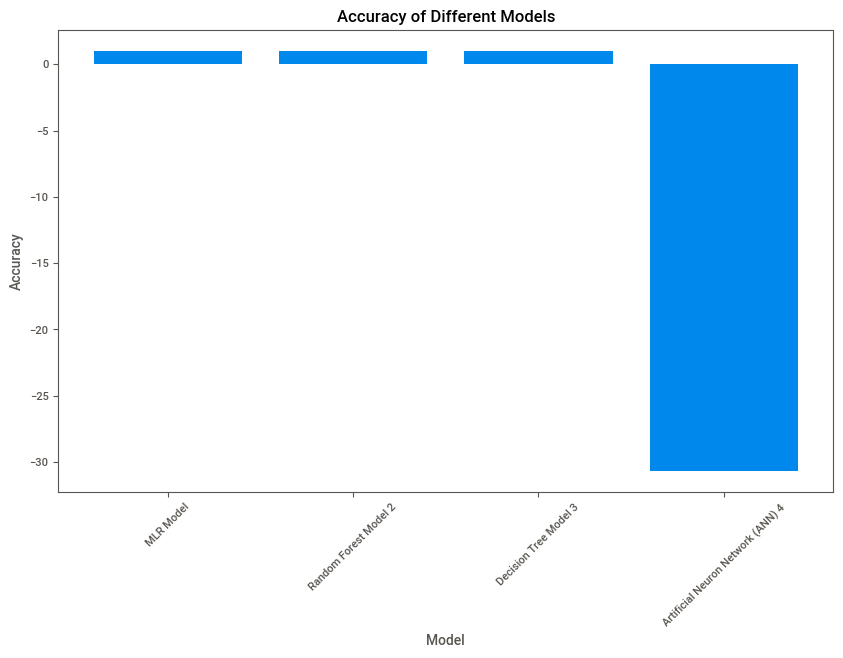

In [147]:
#Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(final_models['Model Name'], final_models['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()


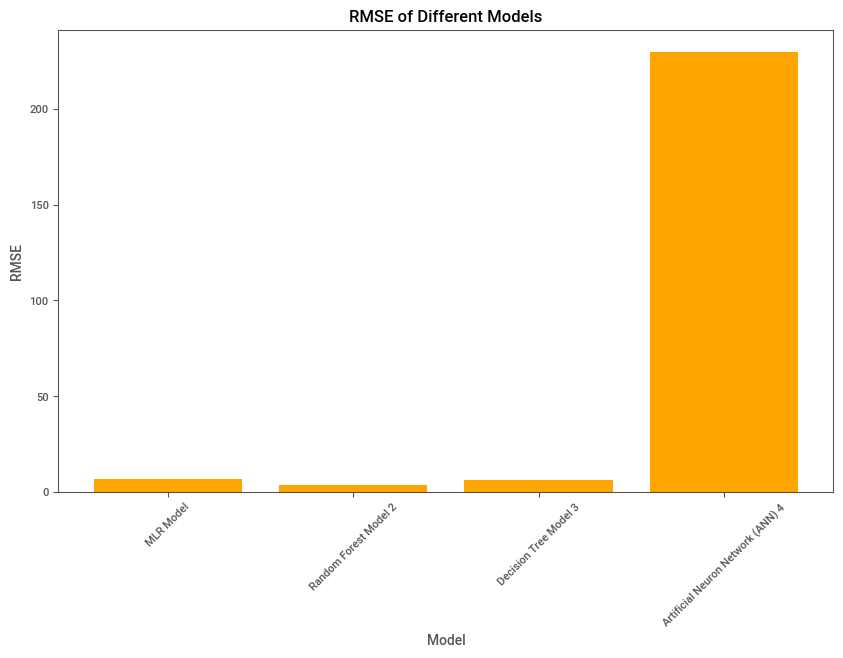

In [148]:
# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(final_models['Model Name'], final_models['RMSE'], color='orange')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Models')
plt.xticks(rotation=45)
plt.show()

In [149]:
# Sort by Accuracy
final_models_sorted_accuracy = final_models.sort_values(by='Accuracy', ascending=False)
print("Models sorted by Accuracy:")
print(final_models_sorted_accuracy)

Models sorted by Accuracy:
                          Model Name  Accuracy   RMSE
1              Random Forest Model 2      0.99   3.57
2              Decision Tree Model 3      0.97   6.51
0                          MLR Model      0.97   6.90
3  Artificial Neuron Network (ANN) 4    -30.68 229.64


In [150]:
# Sort by RMSE
final_models_sorted_rmse = final_models.sort_values(by='RMSE')
print("\nModels sorted by RMSE:")
print(final_models_sorted_rmse)


Models sorted by RMSE:
                          Model Name  Accuracy   RMSE
1              Random Forest Model 2      0.99   3.57
2              Decision Tree Model 3      0.97   6.51
0                          MLR Model      0.97   6.90
3  Artificial Neuron Network (ANN) 4    -30.68 229.64


##### ***Conclusion: By looking at these Model's Accuracy & Total Error we can say that Random Forest is giving the Best Accuracy 99% and also***
##### ***the Lowest Total Error 3.57. Random Forest will be used for Deployment.***

In [151]:
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_combo',
       'fuel_consumption_comb_MPG', 'co2_emissions', 'anomaly_scores',
       'anomaly'],
      dtype='object')

In [152]:
import pickle

# Save the Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model2, f)


In [153]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [154]:
%%writefile co2.py
import streamlit as st
import pandas as pd
import pickle

# Load the dataset
df = pd.read_csv('co2_emissions.csv')

# Load the pickled model
with open('random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Create a Streamlit app
st.title('CO2 Emissions Calculator')

engine_size = st.number_input('Engine Size (L):')
fuel_type = st.text_input('Fuel Type:')
cylinders = st.number_input('Cylinders:')
fuel_consumption_hwy=st.number_input('fuel_consumption_hwy:')
fuel_consumption_comb_MPG=st.number_input('fuel_consumption_comb_MPG:')

# Create a button to calculate the CO2 emissions
if st.button('Calculate CO2 Emissions'):
    # Create a dictionary of the input features
    input_features = {
                      'engine_size': engine_size,
                      'fuel_type': fuel_type,
                      'cylinders': cylinders,
                      'fuel_consumption_hwy':fuel_consumption_hwy,
                      'fuel_consumption_comb_MPG': fuel_consumption_comb_MPG
                      }

    # Convert the input features to a DataFrame
    input_df = pd.DataFrame(input_features, index=[0])

    input_df['fuel_type'] = df['fuel_type'].apply(lambda x: df['fuel_type'].index(x) if x in df['fuel_type'] else -1)


    # Make predictions using the random forest model
    co2_emissions = model.predict(input_df)[0]

    # Display the predicted CO2 emissions
    st.write('Predicted CO2 Emissions:', co2_emissions)

Writing co2.py


In [155]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.261s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [156]:
!streamlit run co2.py &>/content/logs.txt &

In [157]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.75.245.5
npx: installed 22 in 2.885s
your url is: https://smart-vans-behave.loca.lt
